### The below Analysis based on the VIX Volatility Index. VIX is generated from the implied volatilities on index options for the S&P 500, and it shows the market's expectation of 30-day volatility. Known also as the "fear index," among other similar names, VIX is commonly used as a measure of investor confidence in the market, or, conversely, as a way of gauging how fearful market participants are that volatility will plague the space. The VIX tends to be largely based on stock market reactions; for instance, when the prices of stocks fall, VIX tends to Increase

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs 
import cufflinks as cf

In [2]:
data = pd.read_csv("resources/vix_data_cleaned", index_col = "dates", parse_dates = True)

## Data is consistent with a few missing values. WE will begin our analysis below with checking for the missing data below. Assuming that the missing data is the Dates where we were not in the market

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 23 columns):
UVXY                3246 non-null float64
SPY                 3246 non-null float64
VXXBEN              3246 non-null float64
VIX                 3246 non-null float64
UX1                 3246 non-null float64
UX2                 3246 non-null float64
UX3                 3246 non-null float64
UX4                 3246 non-null float64
Day of Week         3246 non-null int64
Days to Roll        3246 non-null int64
Day in Cycle        3229 non-null float64
Daily Decay         3229 non-null float64
VXXGREG             3246 non-null float64
UX1 % returns       3245 non-null float64
UX2 % returns       3245 non-null float64
UX3 % returns       3245 non-null float64
UX4 % returns       3245 non-null float64
UVXY % returns      3245 non-null float64
SPY % returns       3245 non-null float64
VXXBEN % returns    3245 non-null float64
VIX % returns       3245 non-null float

## Looks like therei is not much missing data. We wil consider this when doing our analysis

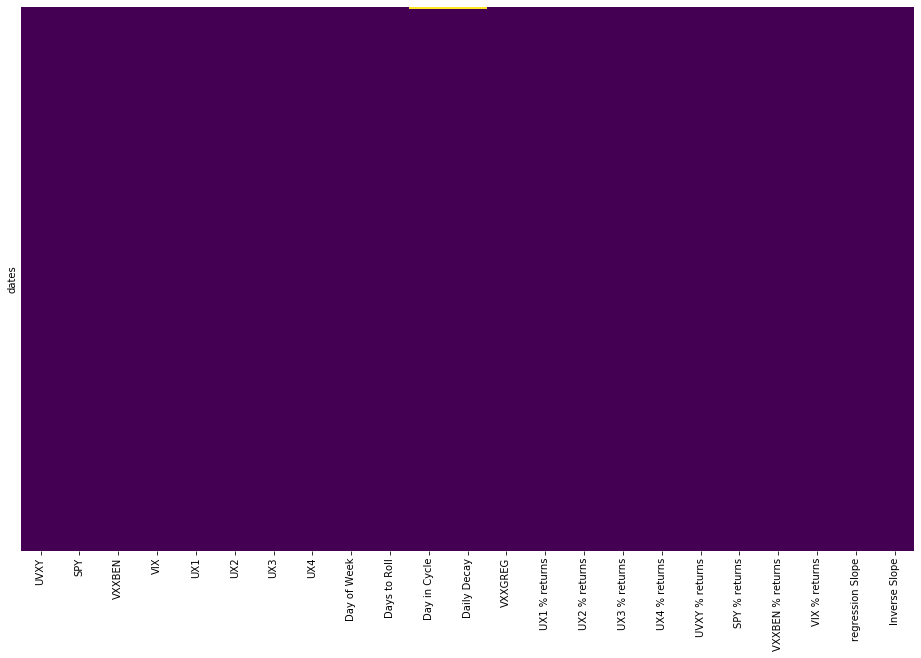

In [4]:
plt.figure(figsize=(16,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## THe data will be evaluated one column at a time prior to making sorting, comparisons, and sorting data 

In [5]:
data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns', 'VIX % returns',
       'regression Slope', 'Inverse Slope'],
      dtype='object')

## UVXY - There was a huge dip in UVXY middle of 2008 most likely related to the crash. 

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



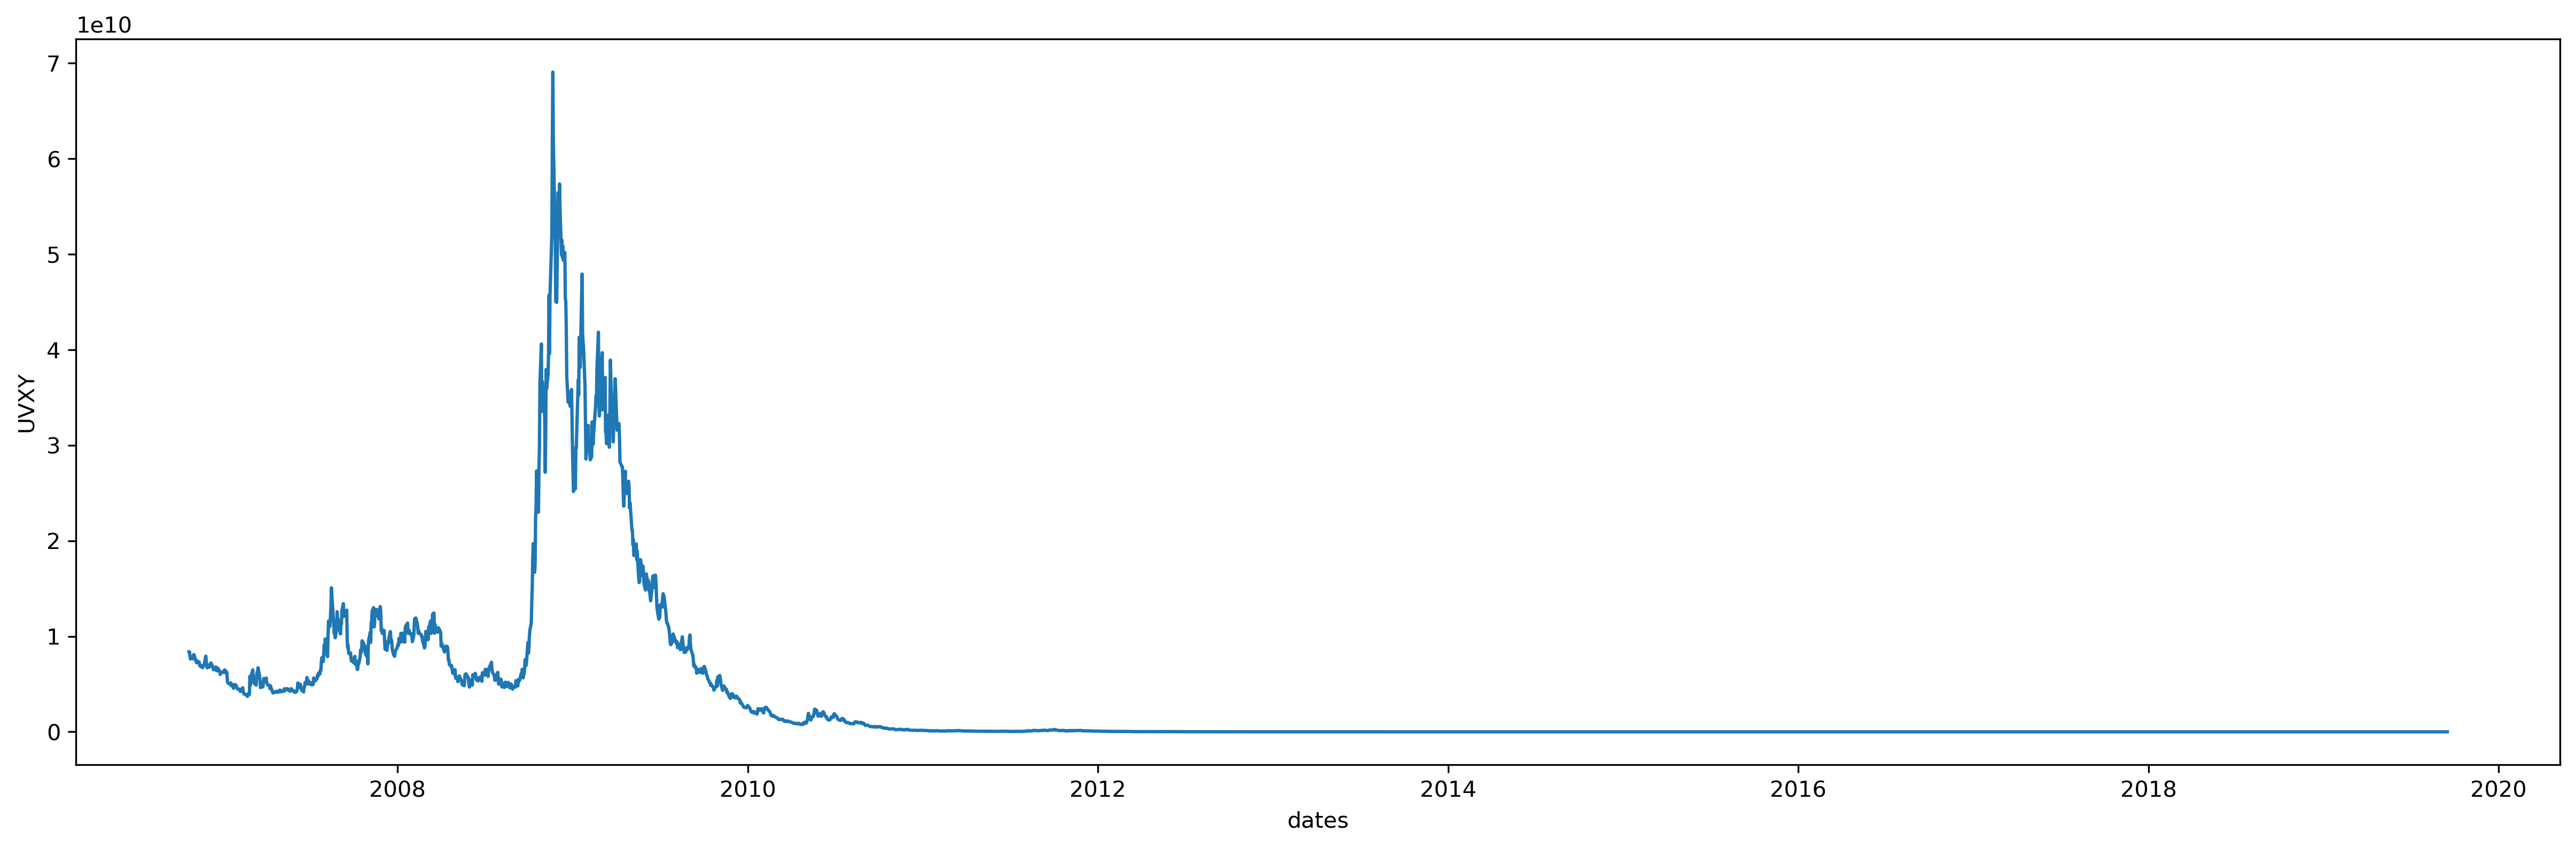

In [6]:
plt.figure(figsize=(20,6), dpi= 300)
sns.lineplot(x = data.index, y = data["UVXY"], data=data);

In [7]:
data["UVXY"].idxmax()

Timestamp('2008-11-20 00:00:00')

In [8]:
data["UVXY"].loc["2008-11-20"]

69072366961.0

### The Fall of UVXY began 2008-11-20 at the peek value of 69,072,366,961. Below observations show that there were huge impacts on markets in 2008 as well as late 2015 and early 2016. 


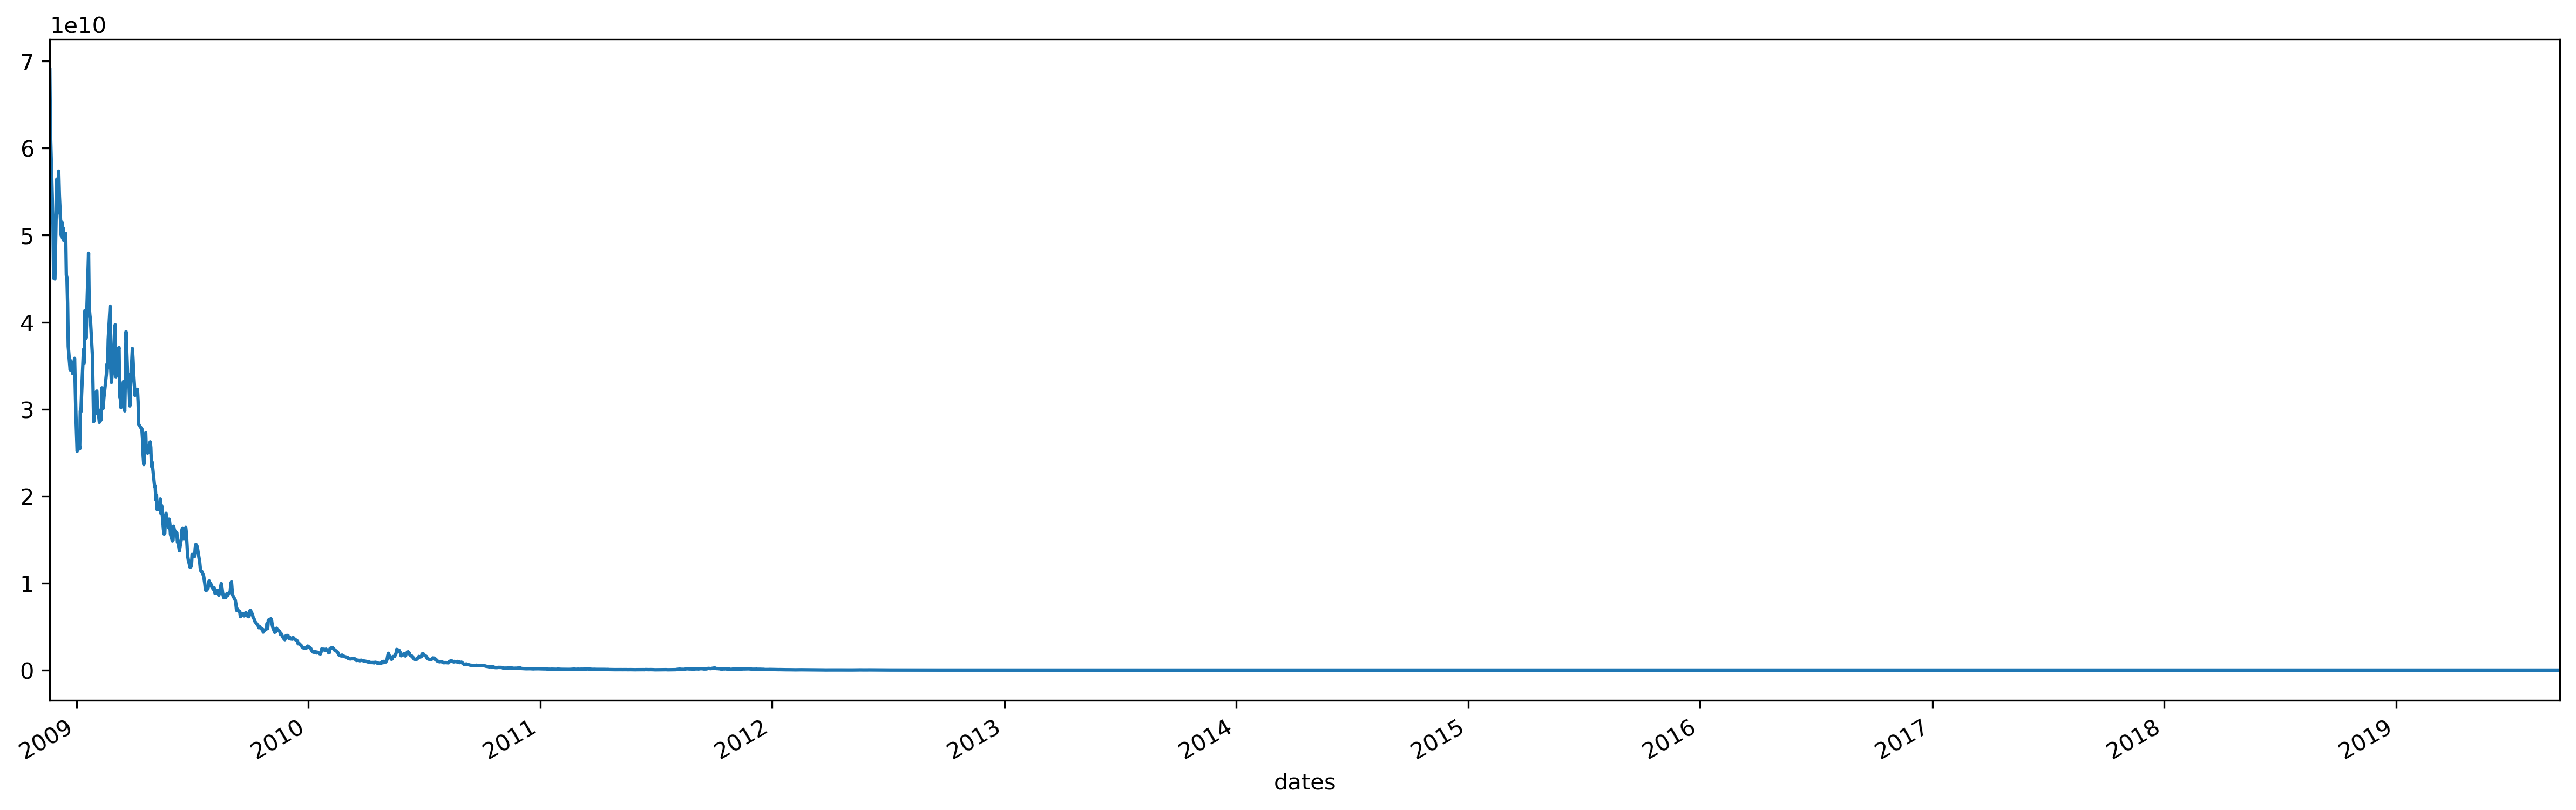

In [9]:
plt.figure(figsize=(20,6), dpi= 300)
data["UVXY"].loc["2008-11-20":].plot()

## SPY(S&P500)

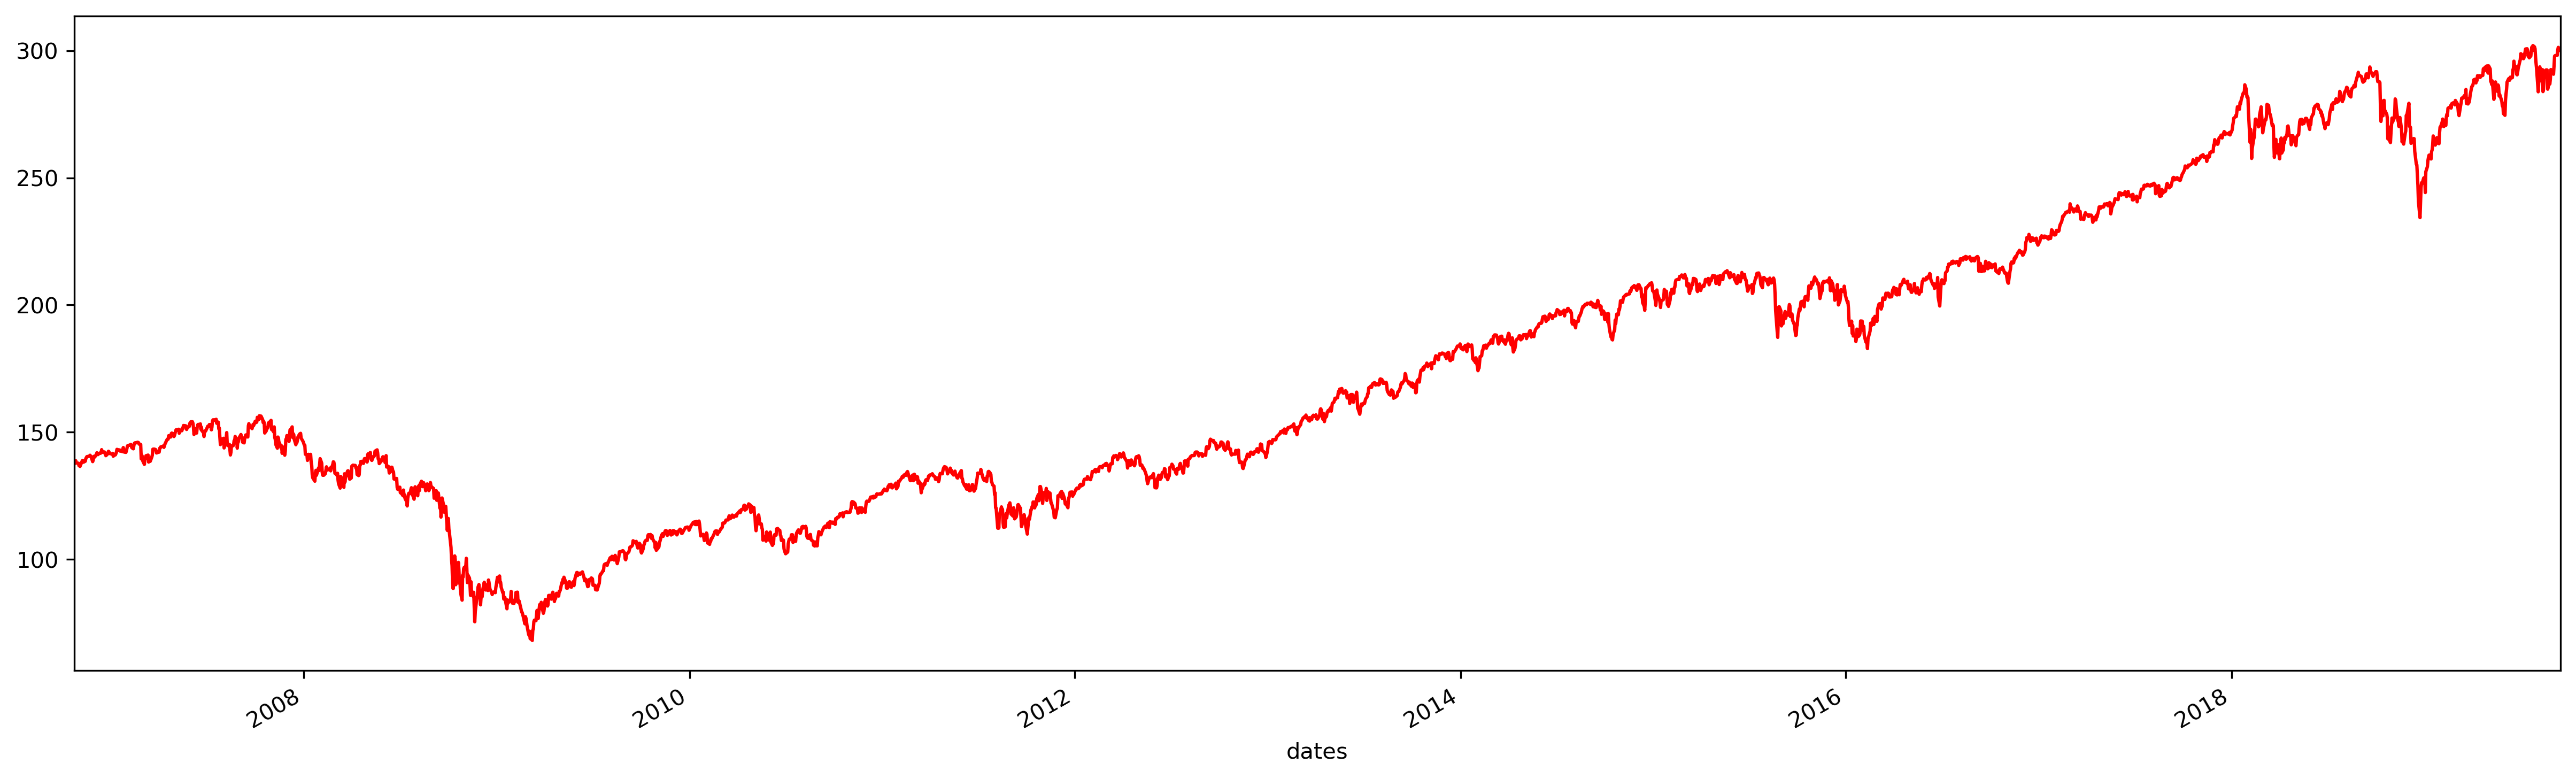

In [10]:
plt.figure(figsize=(20,6), dpi= 300)
data["SPY"].plot(c = "r")

### VIX

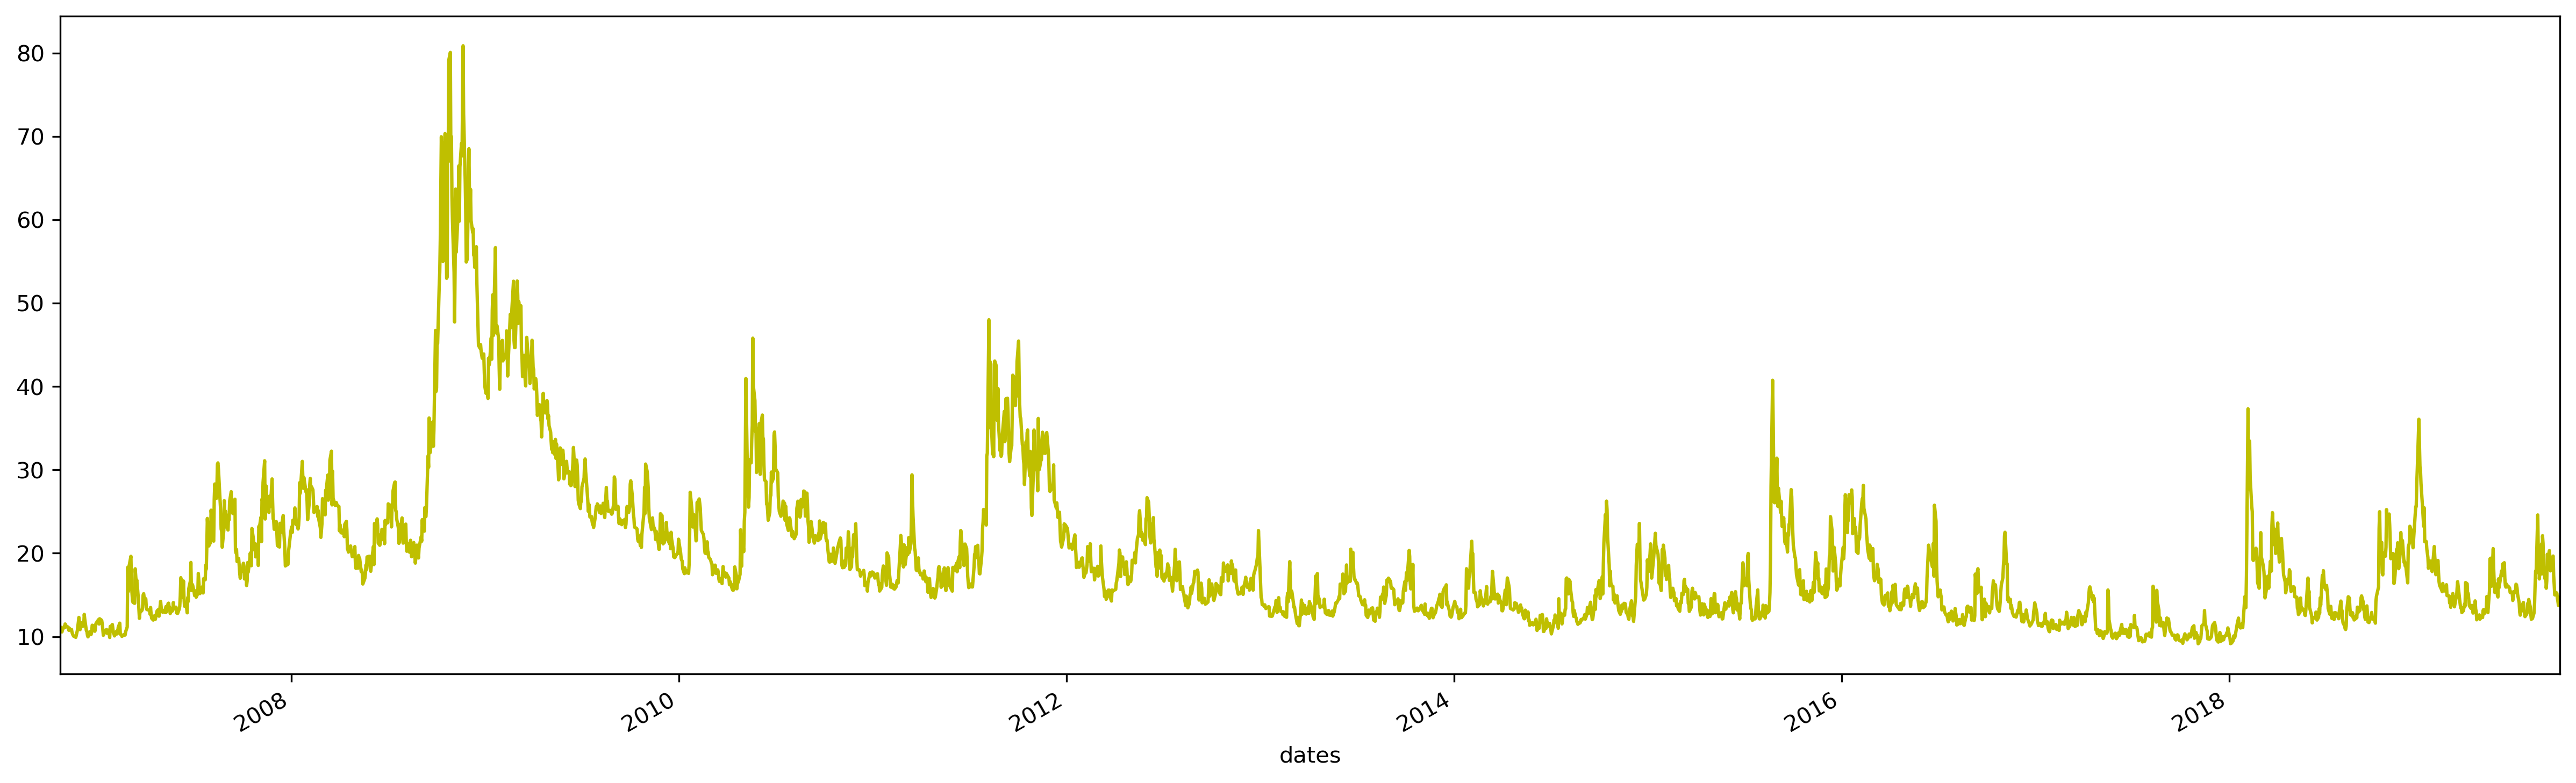

In [11]:
plt.figure(figsize=(20,6), dpi= 300)
data["VIX"].plot(c = "y")

## VXXBEN

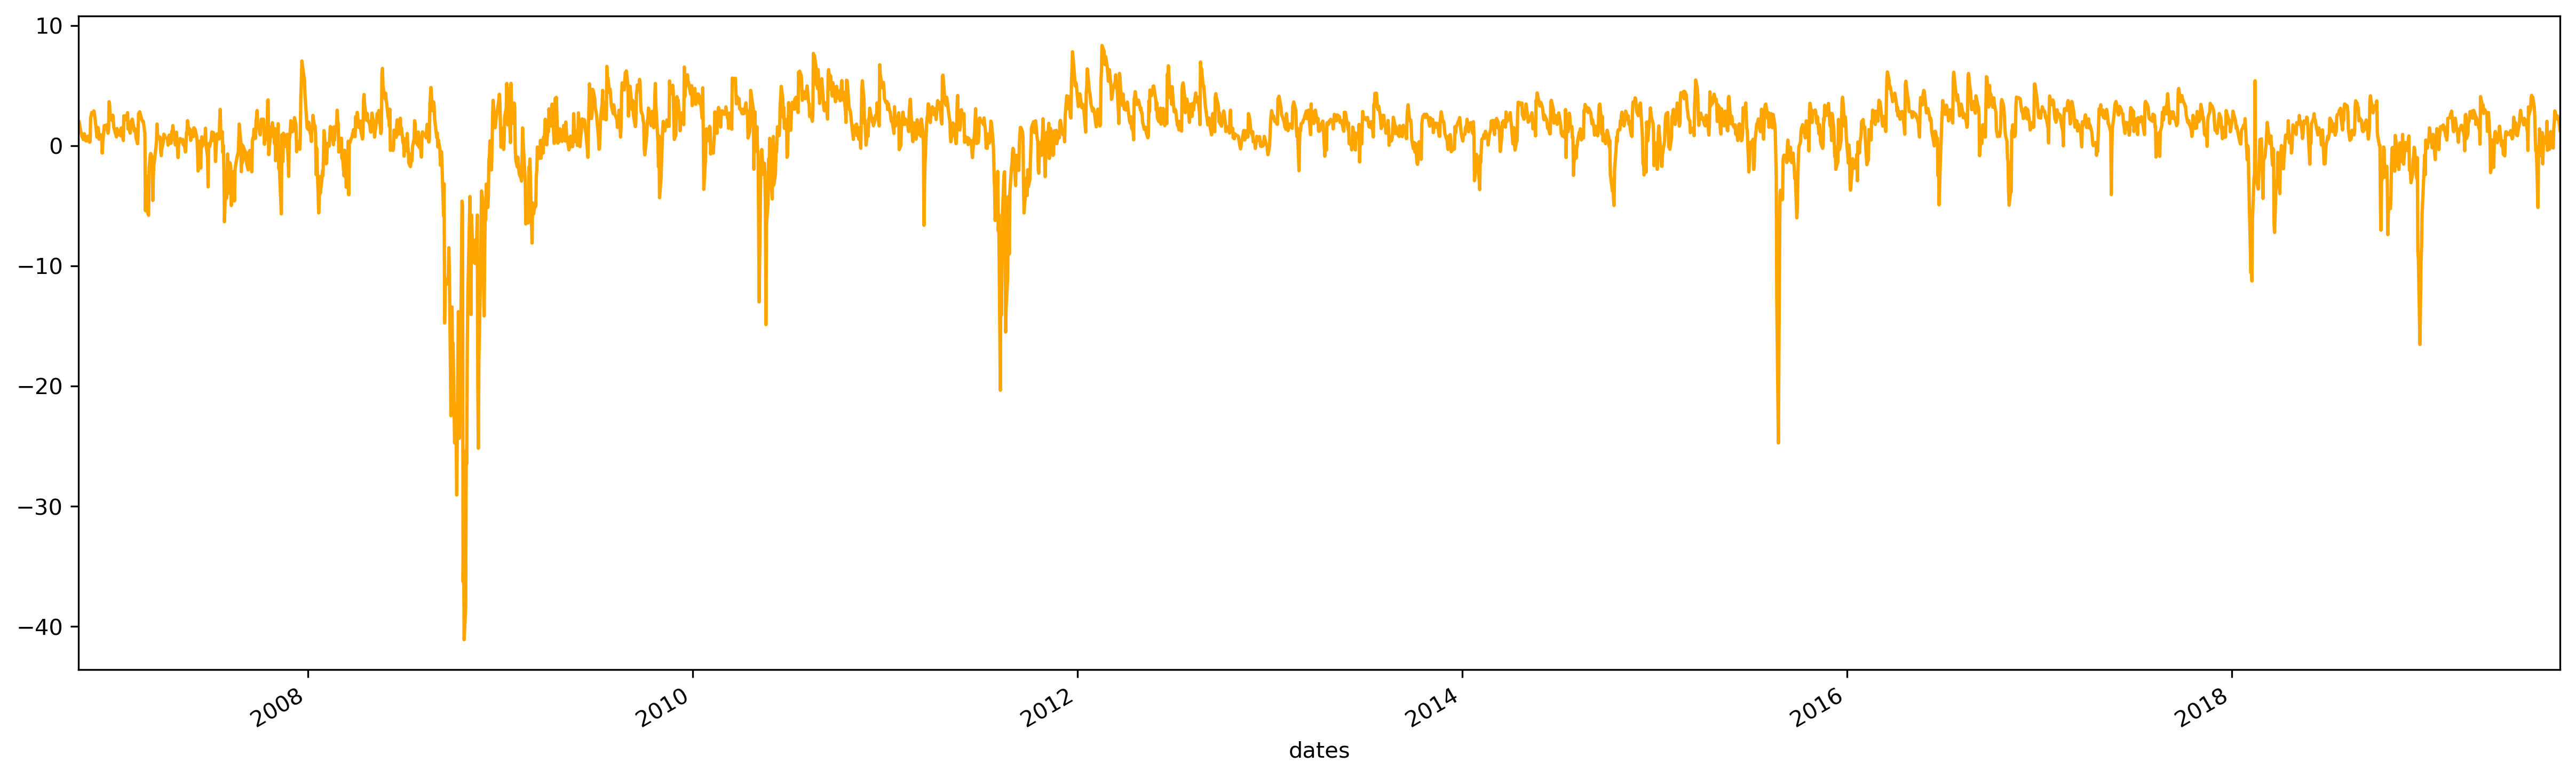

In [12]:
plt.figure(figsize=(20,6), dpi= 300)
data["VXXBEN"].plot(c = "orange");

## Comparison of each security.

## Below we can see there is a strong positive correlation between UVXY and VIX. A negative correlation between vix and vxxben, vxxben and UVXY. Negative correlation between SPY and VIX, nefgative correlation bettween UVXY and SPY. THe correlation matrix will give the corrent values below as well as a heat map

<Figure size 9000x1800 with 0 Axes>

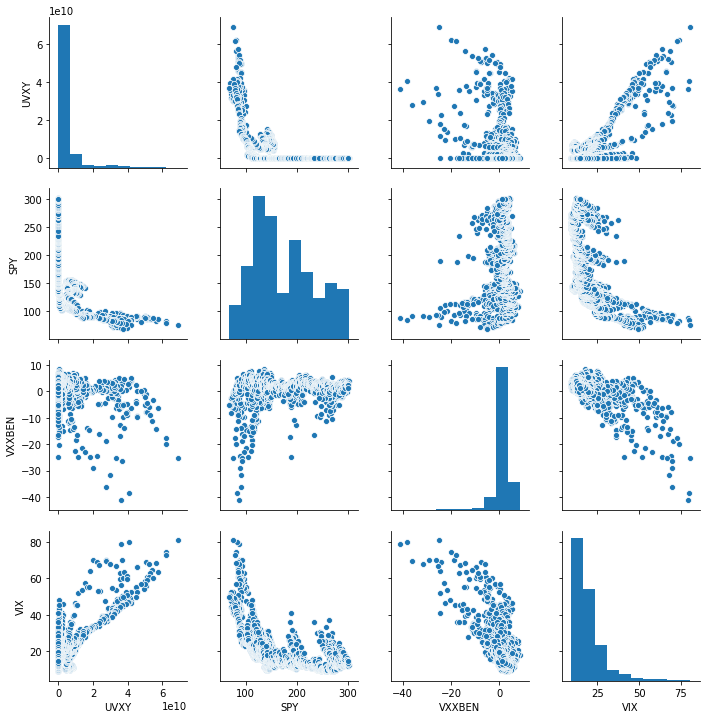

In [13]:
plt.figure(figsize=(30,6), dpi= 300)
sns.pairplot(data[["UVXY","SPY","VXXBEN","VIX"]])

In [14]:
data[["UVXY","SPY","VXXBEN","VIX"]].corr()

,UVXY,SPY,VXXBEN,VIX
UVXY,1.000000,-0.475047,-0.357154,0.771315
SPY,-0.475047,1.000000,0.091179,-0.557329
VXXBEN,-0.357154,0.091179,1.000000,-0.612038
VIX,0.771315,-0.557329,-0.612038,1.000000


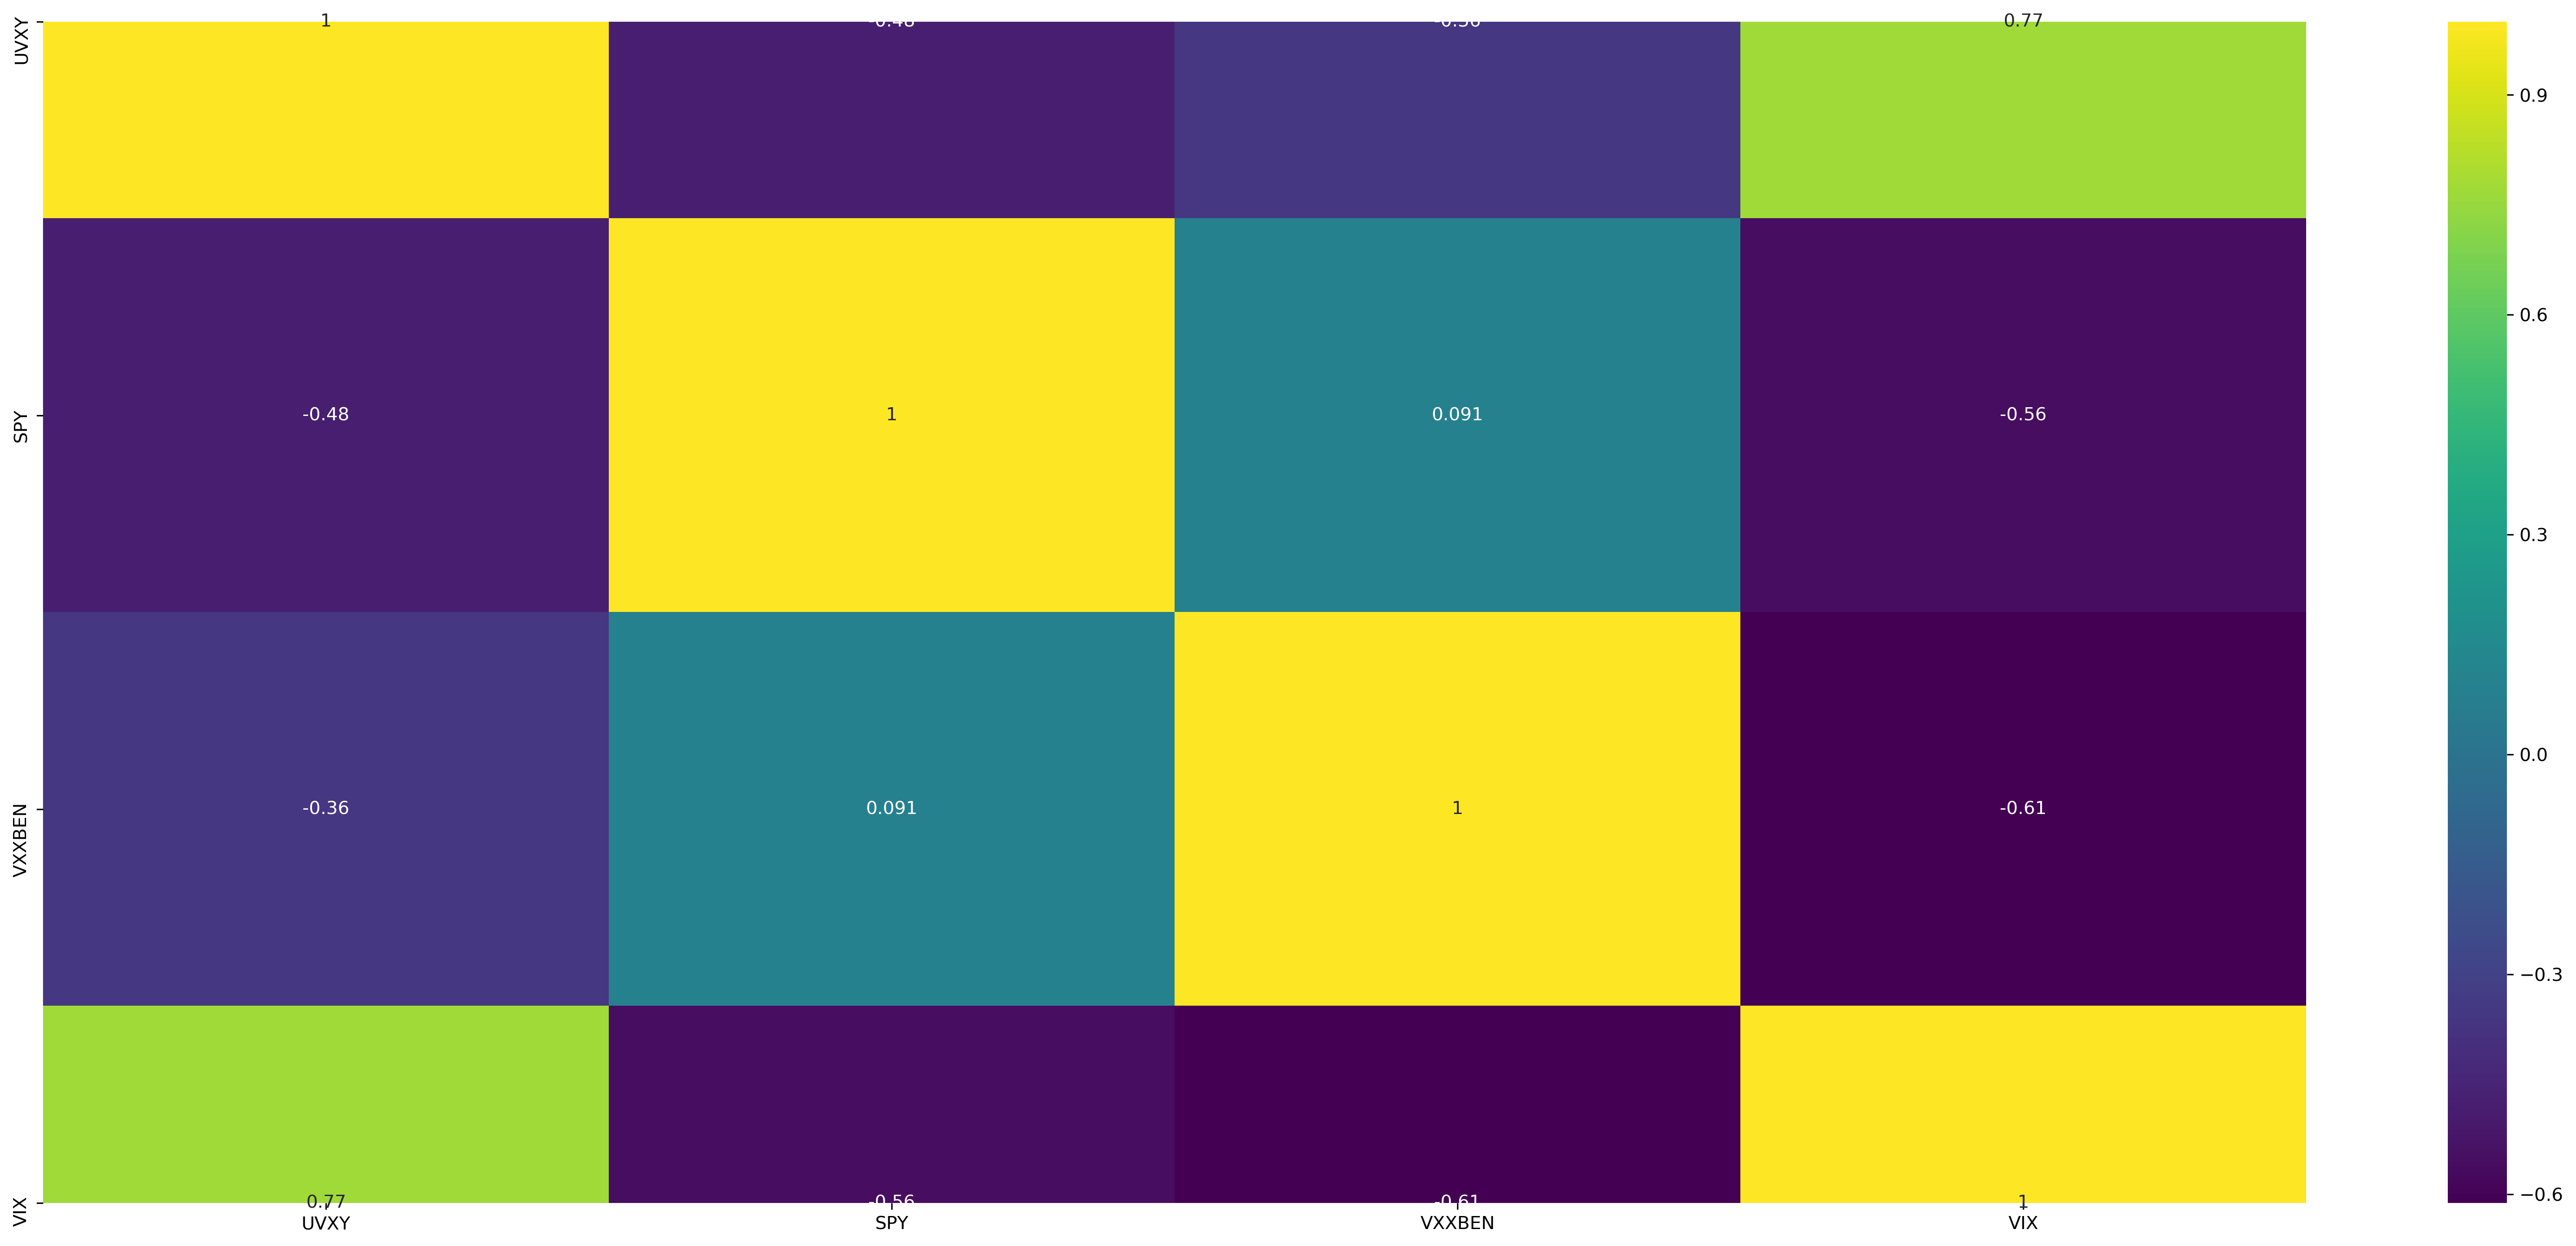

In [15]:
plt.figure(figsize=(28,12), dpi= 300)
sns.heatmap(data[["UVXY","SPY","VXXBEN","VIX"]].corr(), annot=True, cmap="viridis")

### Daily Decay

In [16]:
data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns', 'VIX % returns',
       'regression Slope', 'Inverse Slope'],
      dtype='object')

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



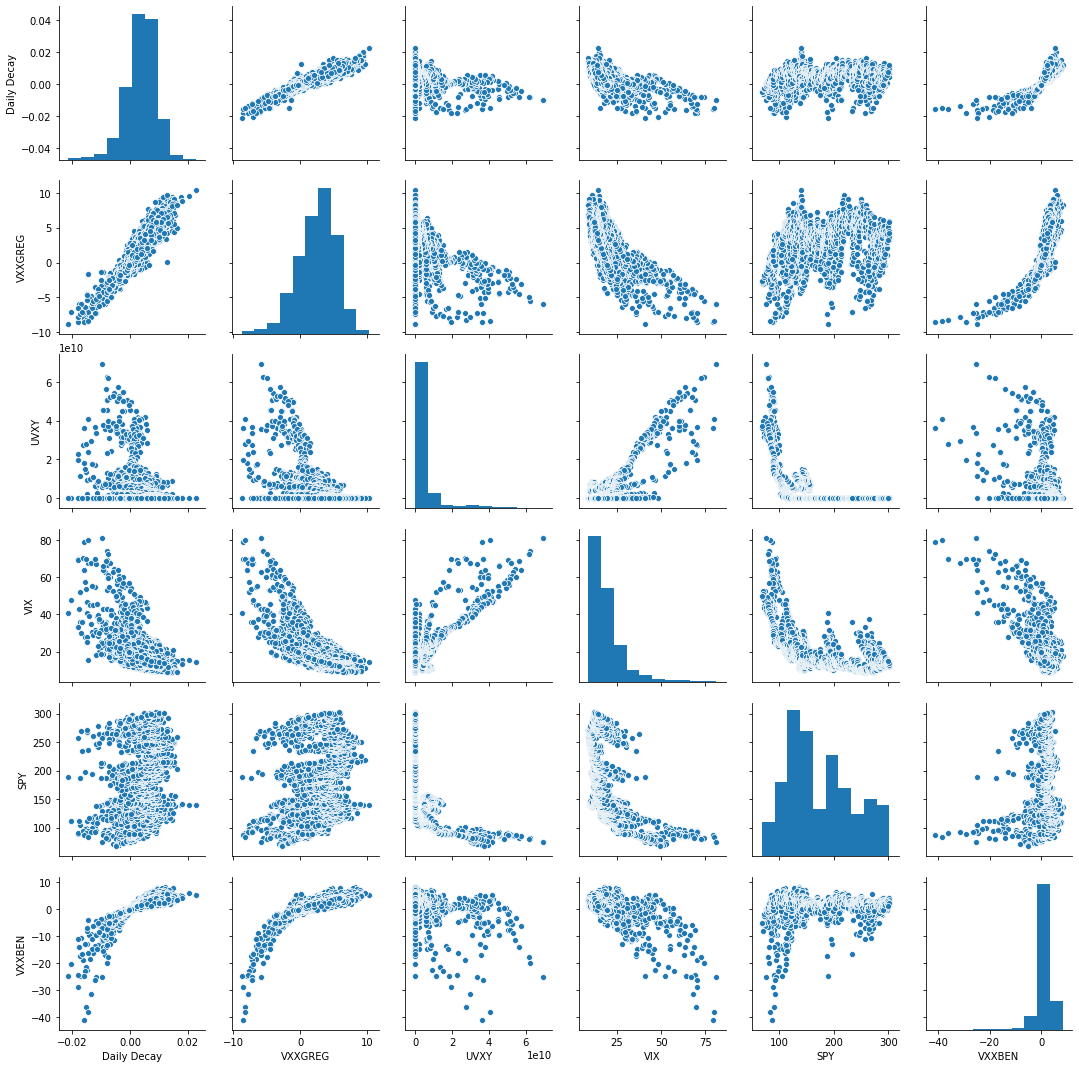

In [17]:
sns.pairplot(data[['Daily Decay',"VXXGREG",'UVXY', "VIX",'SPY', 'VXXBEN']])

In [18]:
data[['Daily Decay',"VXXGREG",'UVXY', "VIX",'SPY', 'VXXBEN']].corr()

,Daily Decay,VXXGREG,UVXY,VIX,SPY,VXXBEN
Daily Decay,1.000000,0.930970,-0.321207,-0.608799,0.174792,0.806198
VXXGREG,0.930970,1.000000,-0.431376,-0.696887,0.179910,0.788790
UVXY,-0.321207,-0.431376,1.000000,0.771315,-0.475047,-0.357154
VIX,-0.608799,-0.696887,0.771315,1.000000,-0.557329,-0.612038
SPY,0.174792,0.179910,-0.475047,-0.557329,1.000000,0.091179
VXXBEN,0.806198,0.788790,-0.357154,-0.612038,0.091179,1.000000


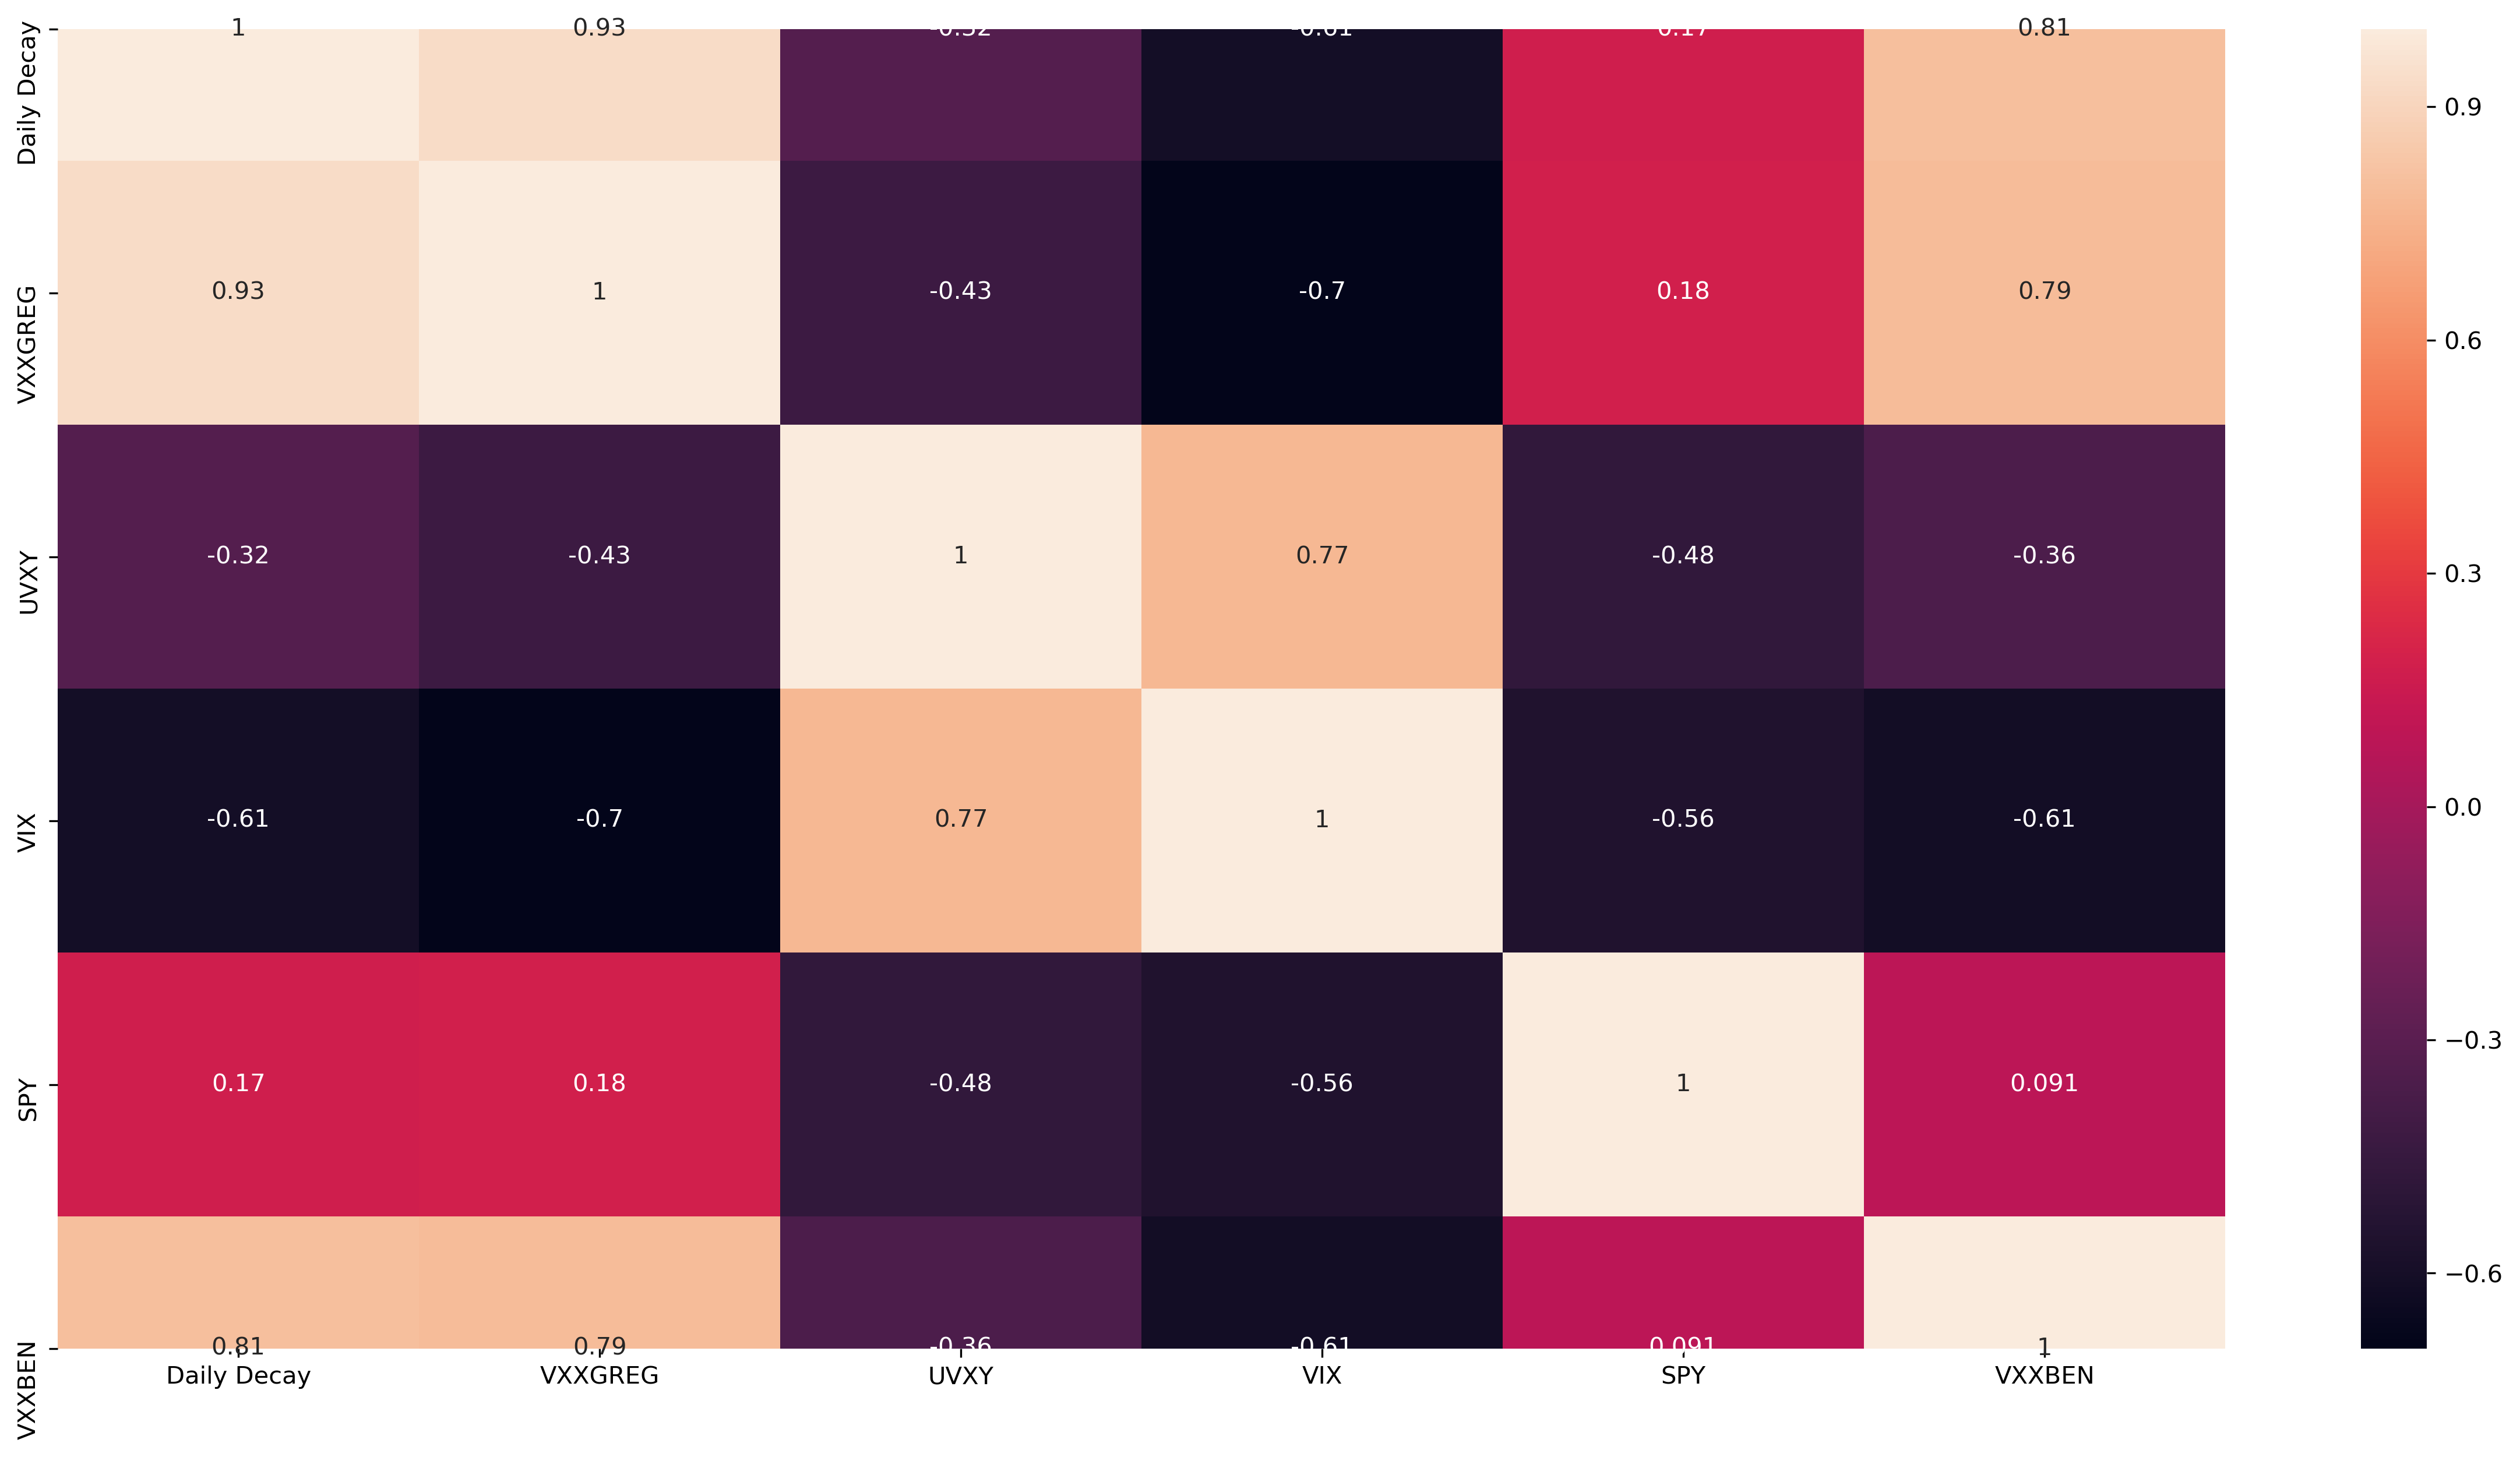

In [19]:
plt.figure(figsize=(20,10), dpi= 300)
sns.heatmap(data[['Daily Decay',"VXXGREG",'UVXY', "VIX",'SPY', 'VXXBEN']].corr(), annot=True)

# Point from when we are in market (AS Portfolio)

In [20]:
portfolio = data.loc["2006-11-15":]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a5ec690>,
      dtype=object)

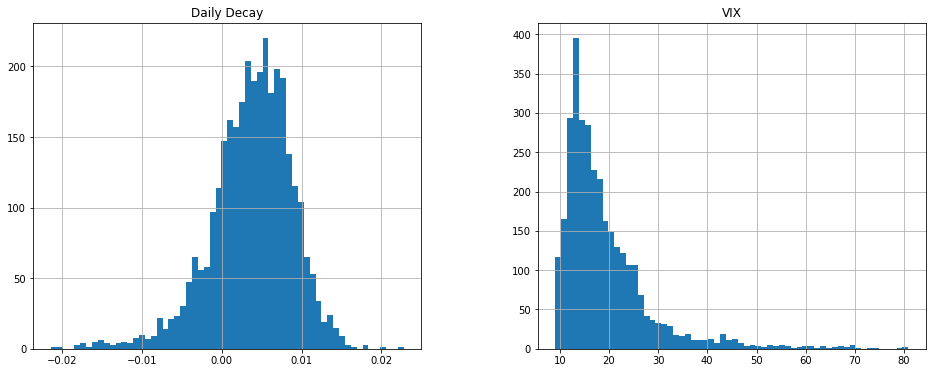

In [21]:
portfolio[["Daily Decay", "VIX"]].hist(figsize = (16,6), bins = 60)

### Already Establised Model -> Daily decay > 2 get out 

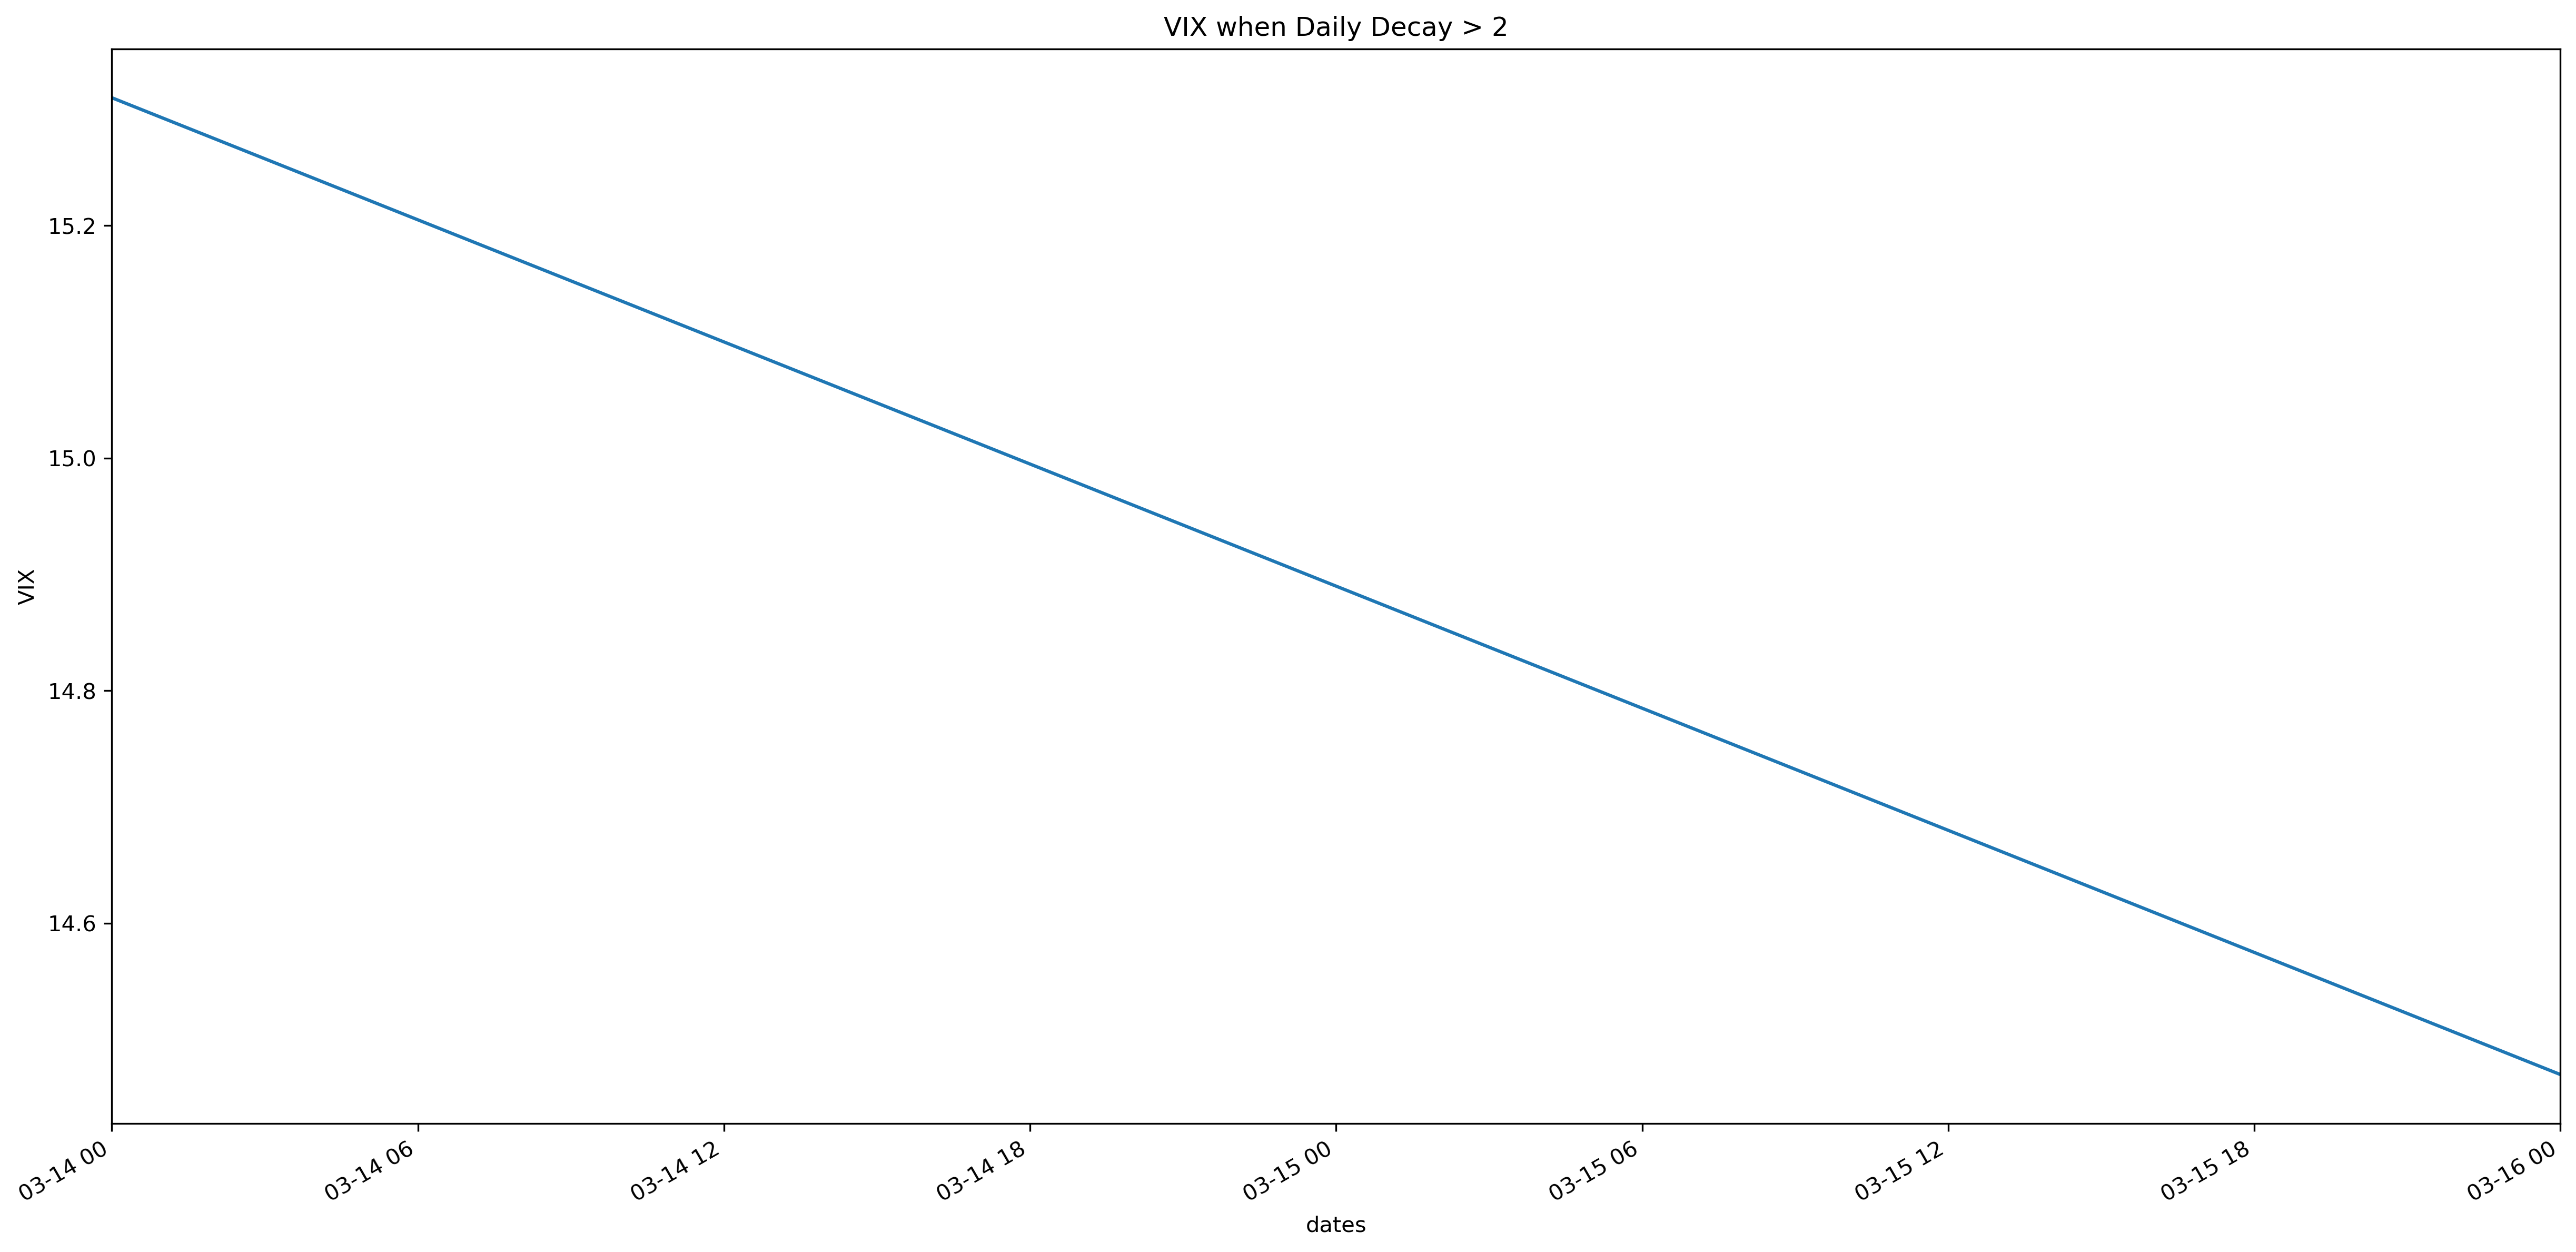

In [22]:
plt.figure(figsize=(20,10), dpi = 300)
plt.title("VIX when Daily Decay > 2")
plt.ylabel("VIX")
portfolio[portfolio["Daily Decay"] * 100 > 2]["VIX"].plot()

In [23]:
portfolio["VXXBEN"].head()

dates
2006-11-15    2.330
2006-11-16    2.485
2006-11-17    2.755
2006-11-20    2.655
2006-11-21    2.890
Name: VXXBEN, dtype: float64

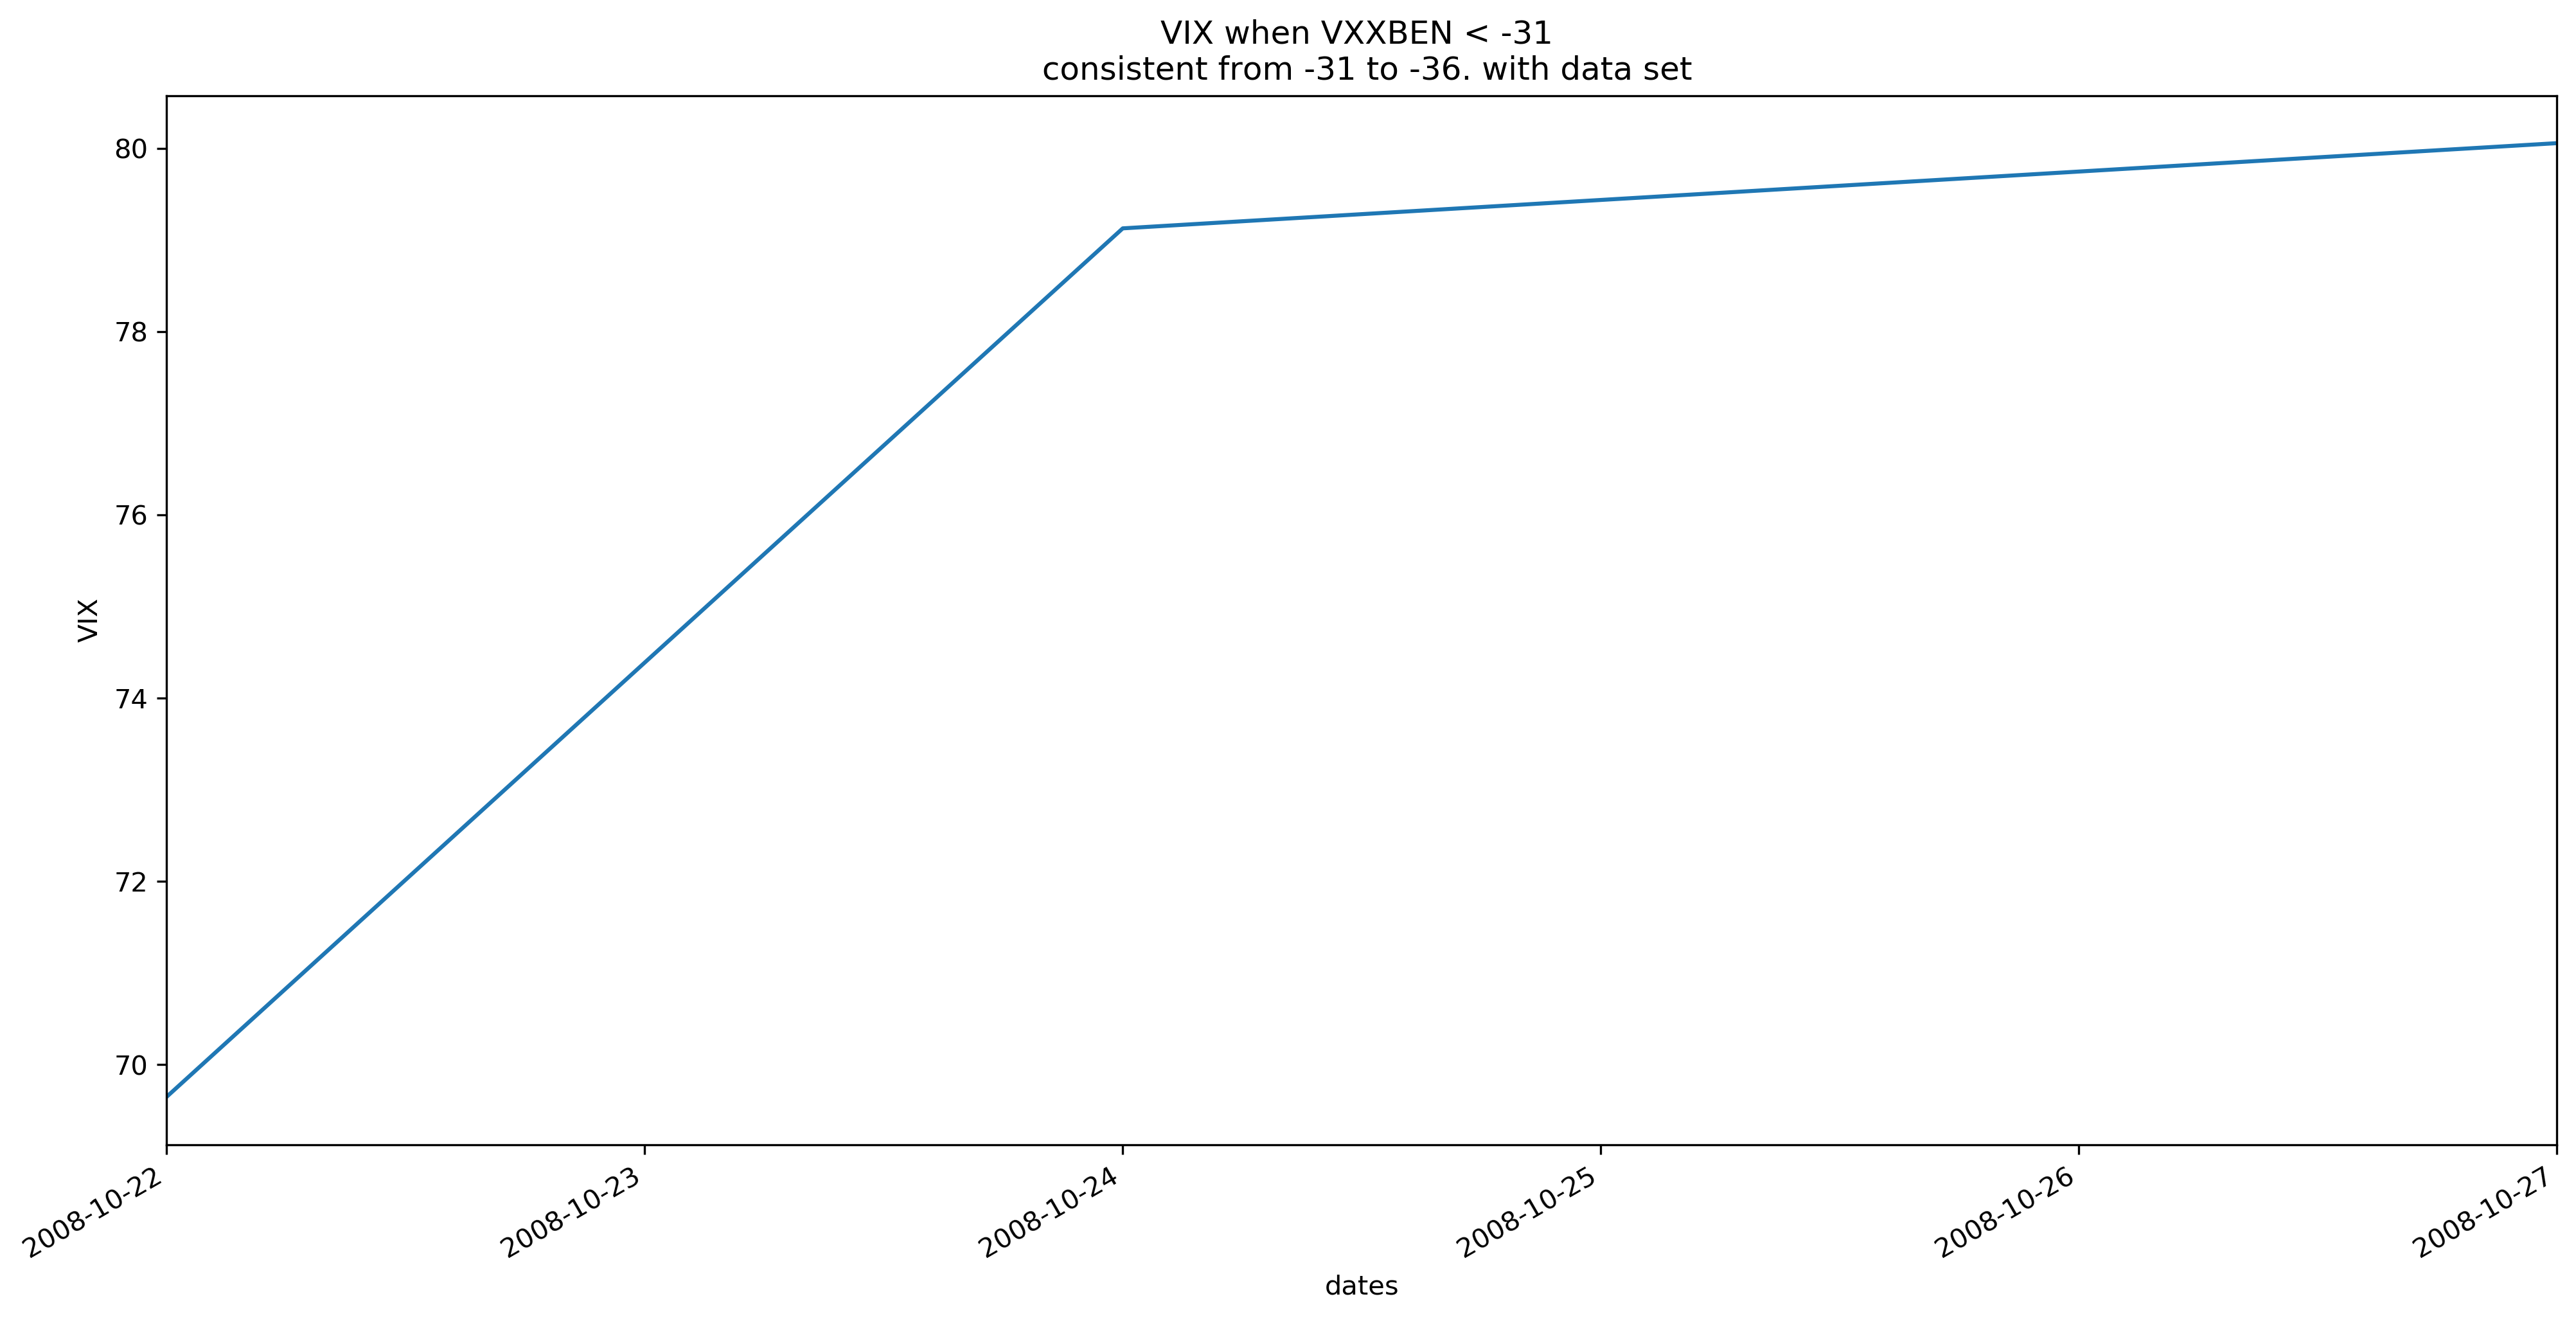

In [24]:
plt.figure(figsize=(16,8), dpi= 300)
plt.title("VIX when VXXBEN < -31 \n consistent from -31 to -36. with data set")
plt.ylabel("VIX")
portfolio[portfolio["VXXBEN"] < -36]["VIX"].plot()

Text(0, 0.5, 'Frequency')

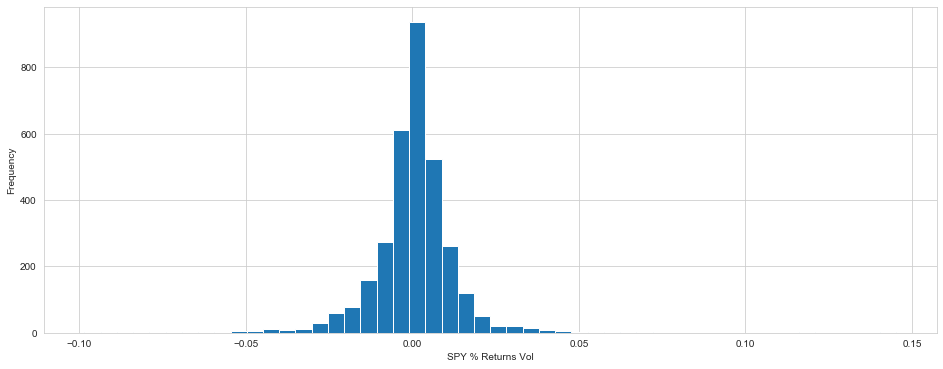

In [25]:
sns.set_style("whitegrid")
portfolio["SPY % returns"].hist(figsize = (16,6), bins = 50)
plt.xlabel("SPY % Returns Vol")
plt.ylabel("Frequency")

In [26]:
(portfolio["SPY % returns"] * 100).max()

14.519774011299425

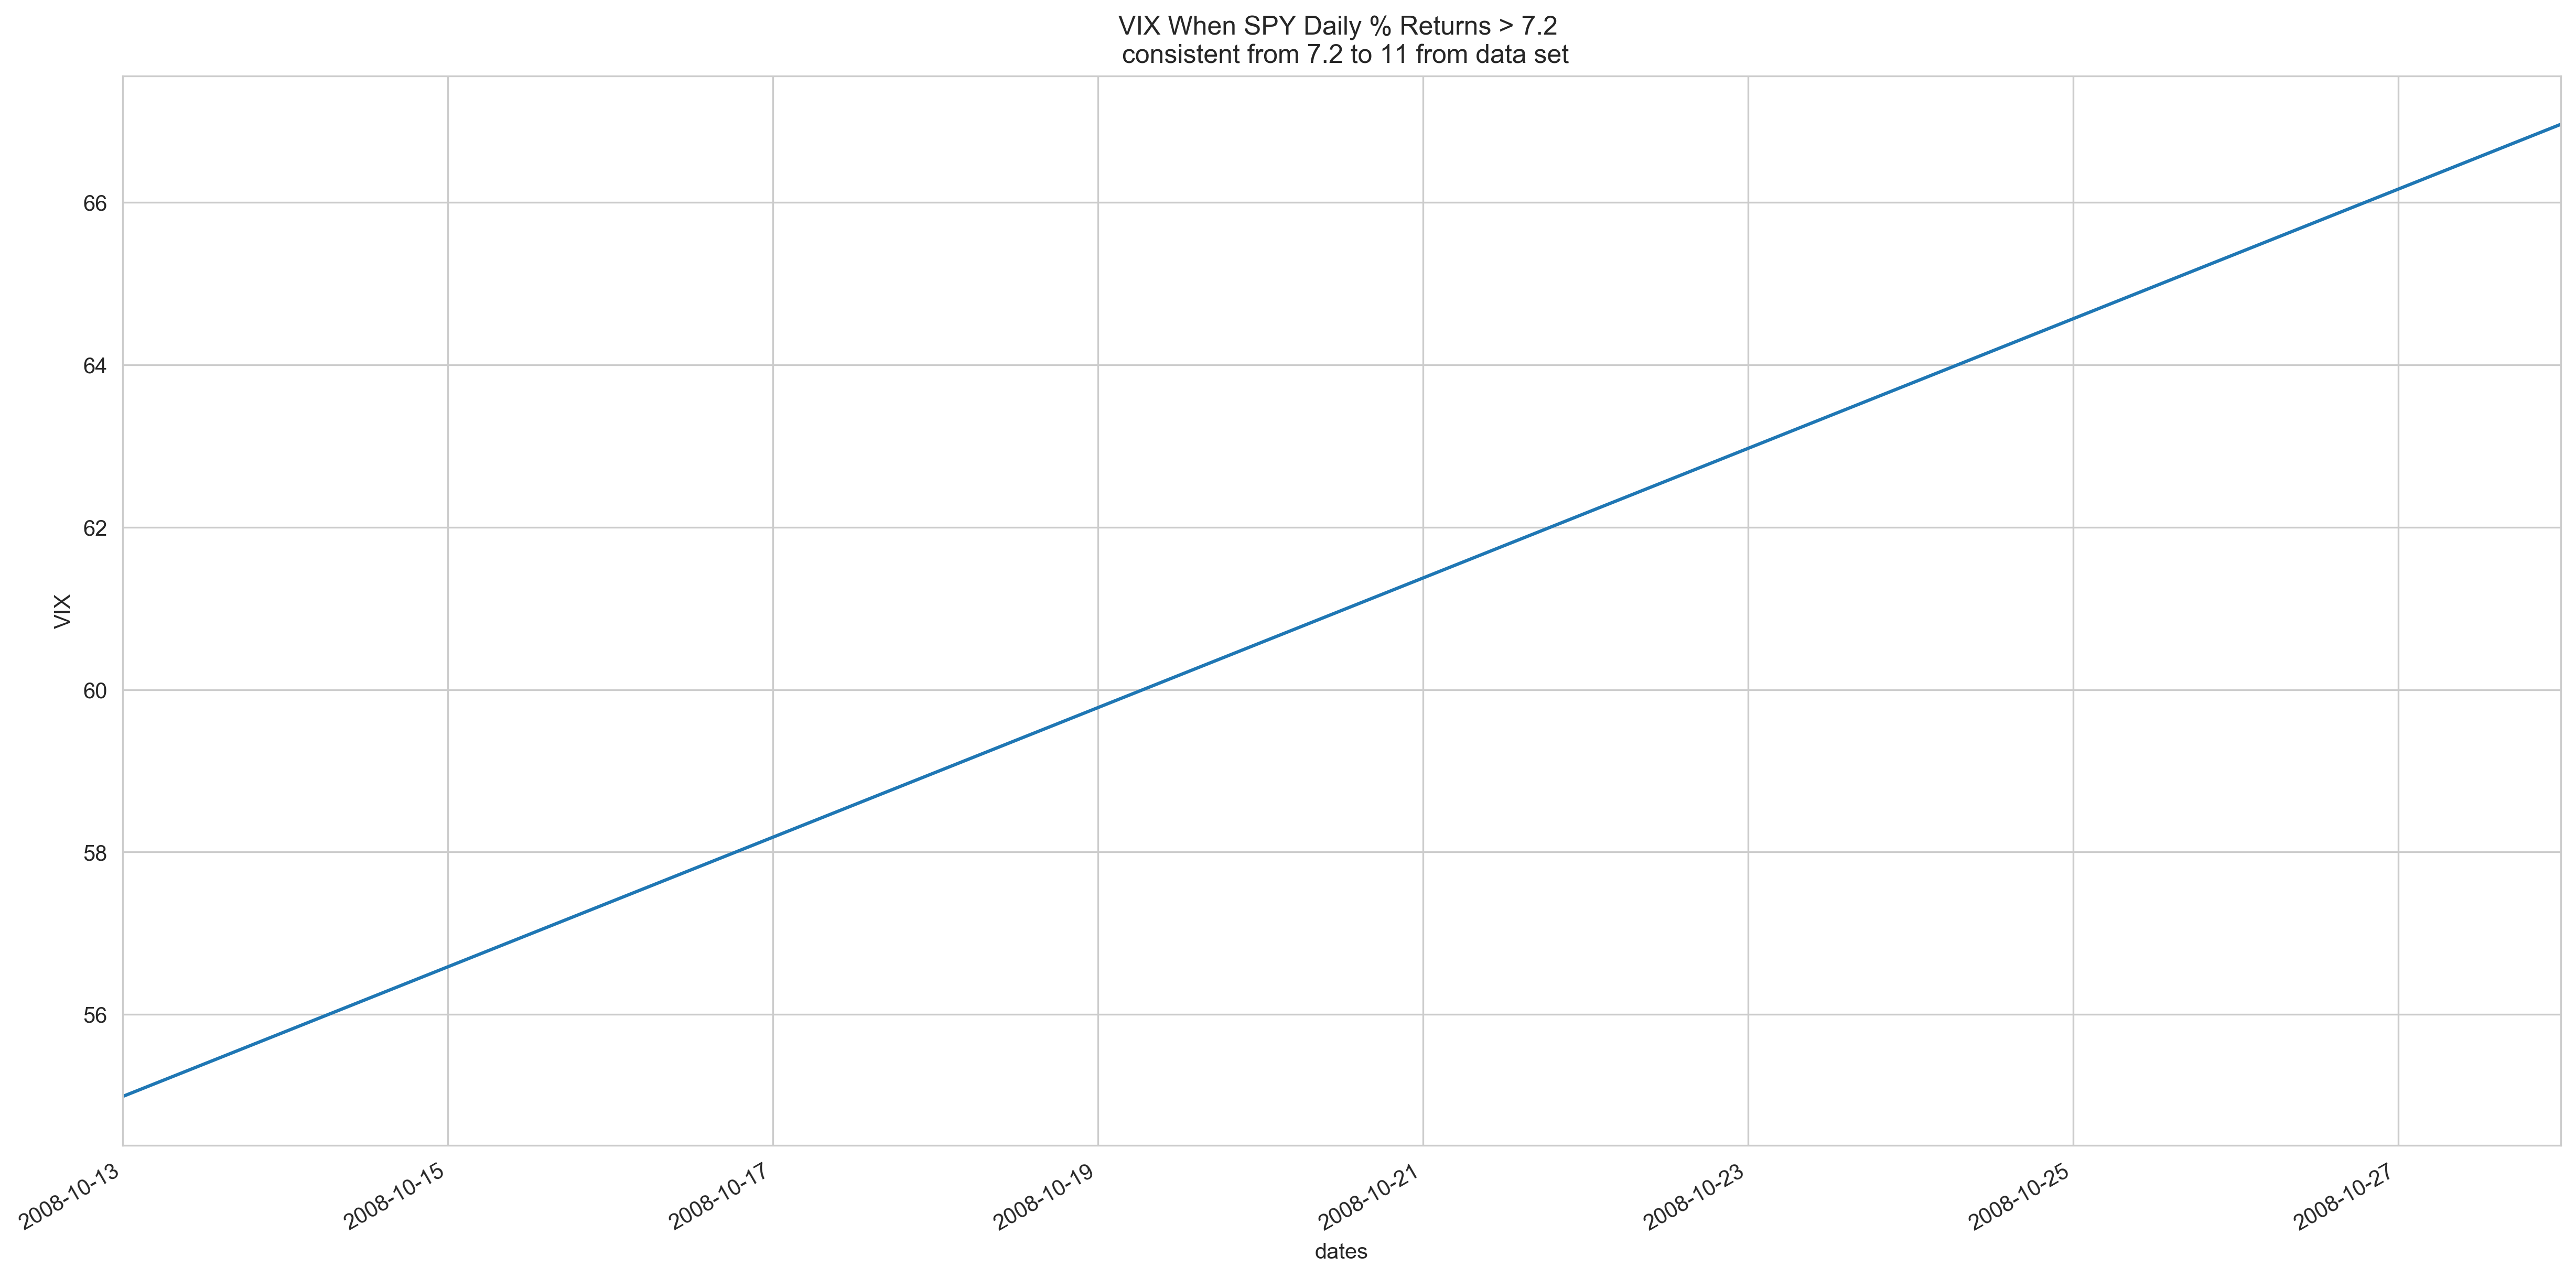

In [27]:
plt.figure(figsize=(20,10), dpi = 300)
plt.title("VIX When SPY Daily % Returns > 7.2 \n consistent from 7.2 to 11 from data set")
plt.ylabel("VIX")
portfolio[portfolio["SPY % returns"] * 100 > 10]["VIX"].plot()

In [28]:
data[['Daily Decay',"VXXGREG",'UVXY', "VIX",'SPY', 'VXXBEN', "UX1"]].corr()

,Daily Decay,VXXGREG,UVXY,VIX,SPY,VXXBEN,UX1
Daily Decay,1.000000,0.930970,-0.321207,-0.608799,0.174792,0.806198,-0.501111
VXXGREG,0.930970,1.000000,-0.431376,-0.696887,0.179910,0.788790,-0.607438
UVXY,-0.321207,-0.431376,1.000000,0.771315,-0.475047,-0.357154,0.785337
VIX,-0.608799,-0.696887,0.771315,1.000000,-0.557329,-0.612038,0.982393
SPY,0.174792,0.179910,-0.475047,-0.557329,1.000000,0.091179,-0.593727
VXXBEN,0.806198,0.788790,-0.357154,-0.612038,0.091179,1.000000,-0.457658
UX1,-0.501111,-0.607438,0.785337,0.982393,-0.593727,-0.457658,1.000000


### Lets use one or two machine learning Algorithims on th data provided and calculated. Since this is financial data and all data is numerical. Using a classifier will not be a good solution or maybe it could be. But how would we classify the data. 

### The aproach is the we are looking for the value of vix so maybe we can take the daily returns of vix and classify it as true or false if the returs are negative or positive. we can then take those values and classify them as 1,0 to put into out algothim. Lets give this a shot

In [29]:
data["VIX % returns"].head()

dates
2006-10-23         NaN
2006-10-24   -0.027076
2006-10-25   -0.011132
2006-10-26   -0.009381
2006-10-27    0.022727
Name: VIX % returns, dtype: float64

In [30]:
vix_returns_bool = list(data["VIX % returns"] < 0)

In [31]:
data["vix daily bool"] = vix_returns_bool

### Now that we have categorrized loss as True(vix <0) and Gains(vix > 0) as false we can take these values and convert them into dummies to create valies for our Ml Algorithims

In [32]:
data["vix daily bool"].head()

dates
2006-10-23    False
2006-10-24     True
2006-10-25     True
2006-10-26     True
2006-10-27    False
Name: vix daily bool, dtype: bool

In [33]:
dummies = pd.get_dummies(data["vix daily bool"], drop_first=True)
dummies.head()

,True
dates,
2006-10-23,0
2006-10-24,1
2006-10-25,1
2006-10-26,1
2006-10-27,0


In [34]:
data["Vix Loss"] = dummies

In [35]:
data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope,vix daily bool,Vix Loss
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.9100,11.08,11.950,13.160,14.080,14.600,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
2006-10-24,8.377069e+09,137.88,2.0250,10.78,11.780,12.830,14.030,14.470,3,16,...,-0.003551,-0.008904,0.000000,0.002982,0.060209,-0.027076,0.963,NaN,True,1
2006-10-25,7.968986e+09,138.35,1.7600,10.66,11.490,12.520,13.790,14.520,4,15,...,-0.017106,0.003455,-0.048714,0.003409,-0.130864,-0.011132,1.002,-1.002,True,1
2006-10-26,7.618653e+09,138.78,1.5150,10.56,11.250,12.210,13.460,14.180,5,14,...,-0.023930,-0.023416,-0.043962,0.003108,-0.139205,-0.009381,0.945,-0.945,True,1
2006-10-27,7.695087e+09,137.91,1.2400,10.80,11.310,12.260,13.460,14.240,6,13,...,0.000000,0.004231,0.010032,-0.006269,-0.181518,0.022727,0.903,-0.903,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,15.20,16.225,17.675,18.025,17.875,2,5,...,0.002782,0.005626,-0.004739,-0.000235,-0.040297,-0.004584,0.715,-0.715,True,1
2019-09-11,2.661000e+01,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,4,...,-0.011096,-0.008392,-0.025275,0.007111,0.092818,-0.038816,0.833,-0.833,True,1
2019-09-12,2.565000e+01,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,3,...,-0.011220,-0.008463,-0.036077,0.003464,-0.127401,-0.026694,0.936,-0.936,True,1


## lets try a logistic Regression on the data to pretict if ViX will be down or up using all other features of the data. We will also make sure that there no null,na,or missing data in the data to be modeled

In [36]:
model_data = data.replace([np.inf, -np.inf], np.nan).dropna()[['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay',"Vix Loss"]]

In [37]:
model_data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay',
       'Vix Loss'],
      dtype='object')

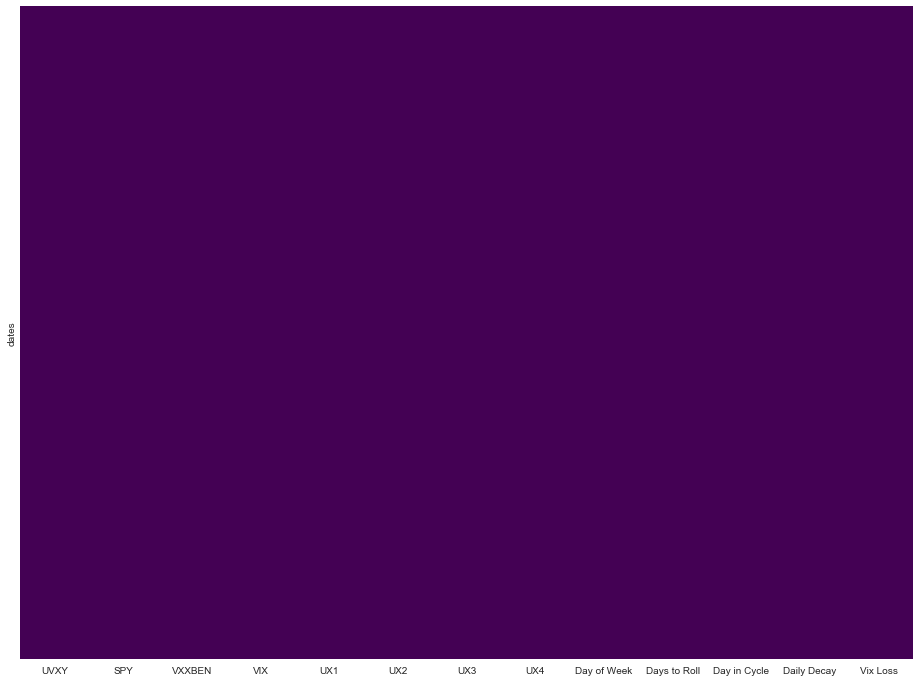

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(model_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

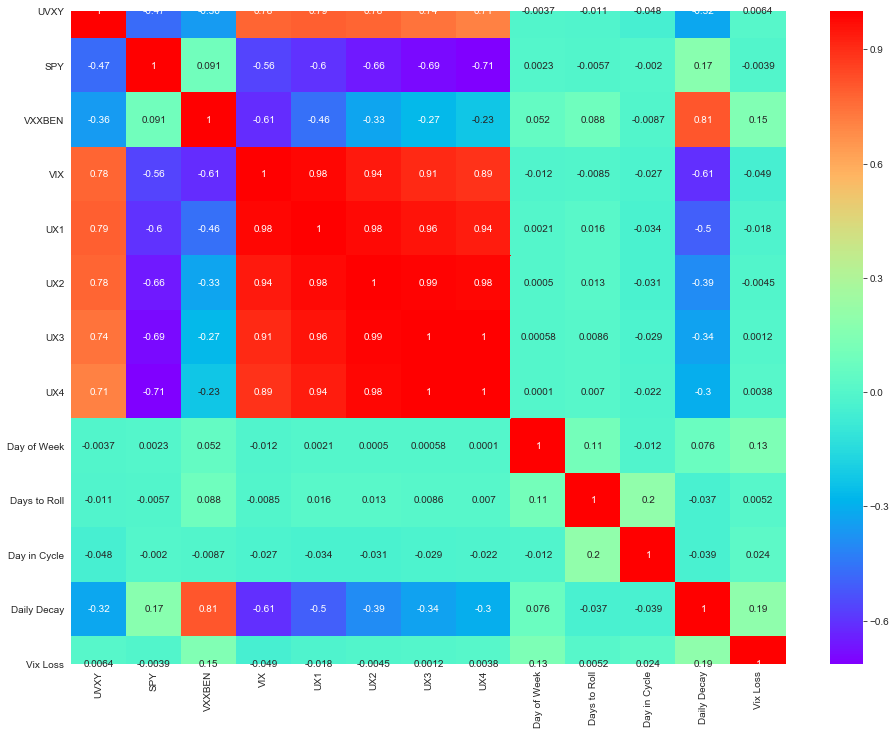

In [39]:
plt.figure(figsize=(16,12))
sns.heatmap(model_data.corr(), annot=True, cmap="rainbow")

## we will use a logistic Regression/KNN/Decisions Tree, and Random Forest to Algrithim to try to preditce 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
log_regress = LogisticRegression()

## We will remove "vix daily bool" also since it seems to be a perfect predictor of ViX loss

In [42]:
X = model_data.drop("Vix Loss", axis=1)
y = model_data["Vix Loss"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Fit the data

In [44]:
log_regress.fit(X_train,y_train)

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predict = log_regress.predict(X_test)

## Lets check the matrix

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       435
           1       0.55      1.00      0.71       534

    accuracy                           0.55       969
   macro avg       0.28      0.50      0.36       969
weighted avg       0.30      0.55      0.39       969



/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [48]:
print(confusion_matrix(y_test, predict))

[[  0 435]
 [  0 534]]


### KNN -> Some What better

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scalar = StandardScaler()

In [51]:
scalar.fit(model_data.drop("Vix Loss", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
data_features = scalar.transform(model_data.drop("Vix Loss", axis = 1))

In [53]:
features_df = pd.DataFrame(data_features, columns=model_data.columns[:-1])

In [54]:
features_df.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,Day in Cycle,Daily Decay
0,0.468766,-0.606496,0.350114,-0.975812,-0.980809,-1.098709,-1.173449,-1.205598,-0.016821,2.042709,1.088993,0.302705
1,0.462908,-0.600381,0.395314,-0.992100,-0.985605,-1.106753,-1.177799,-1.230320,0.697616,1.884004,1.088993,0.445160
2,0.475771,-0.599702,0.474048,-1.004045,-0.974814,-1.102731,-1.171998,-1.221049,1.412052,1.725299,1.088993,0.666756
3,0.445896,-0.598343,0.444887,-1.012732,-1.003589,-1.097369,-1.150245,-1.222594,-1.445694,1.566595,1.088993,0.600390
4,0.457588,-0.595965,0.513416,-1.020334,-0.995196,-1.081282,-1.118341,-1.211778,-0.731257,1.407890,1.088993,0.791874


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
kn = KNeighborsClassifier(n_neighbors=1)

In [57]:
X1 = features_df
y1 = model_data["Vix Loss"]

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [59]:
kn.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
pre = kn.predict(X_test1)

In [61]:
print(classification_report(y_test1, pre))

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       435
           1       0.58      0.57      0.58       534

    accuracy                           0.54       969
   macro avg       0.54      0.54      0.54       969
weighted avg       0.54      0.54      0.54       969



In [62]:
print(confusion_matrix(y_test1,pre))

[[219 216]
 [231 303]]


## Let use the Elbow Method to improve

In [63]:
error_rate = []
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train1,y_train1)
    p = k.predict(X_test1)
    error_rate.append(np.mean(p != y_test1))

## plot the error rate to K value -> looks like a 38 k value will improve our model. But wje tested below looks like there is a not much of an improvment. We may have some over fitting in the data set

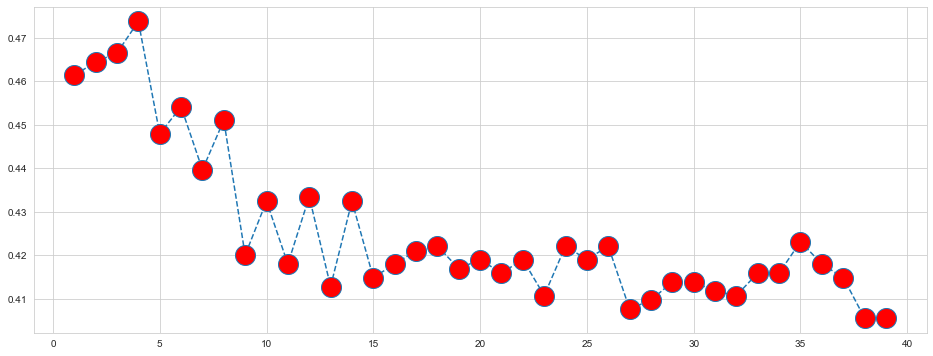

In [64]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, marker = "o", ls = "--", mfc = "red", ms = 20)

In [65]:
kk = KNeighborsClassifier(n_neighbors=38)
kk.fit(X_train1,y_train1)
pp = kk.predict(X_test1)
print(classification_report(y_test1,pp))
print("\n")
print(confusion_matrix(y_test1,pp))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       435
           1       0.64      0.60      0.62       534

    accuracy                           0.59       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.59      0.60       969



[[254 181]
 [212 322]]


## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
tree = DecisionTreeClassifier()

In [68]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
pred = tree.predict(X_test)

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       435
           1       0.60      0.58      0.59       534

    accuracy                           0.55       969
   macro avg       0.55      0.55      0.55       969
weighted avg       0.55      0.55      0.55       969



In [71]:
print(confusion_matrix(y_test, pred))

[[226 209]
 [226 308]]


## Random Forest -> Winner as of now

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
forest = RandomForestClassifier(n_estimators=200)

In [74]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
ppp = forest.predict(X_test)

In [76]:
print(classification_report(y_test,ppp))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       435
           1       0.63      0.64      0.63       534

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



## SVM -> Support Vector Machine

In [77]:
from sklearn.svm import SVC

In [78]:
Sclass = SVC()

In [79]:
Sclass.fit(X_train,y_train)

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
ppp = Sclass.predict(X_test)

In [81]:
print(classification_report(y_test,ppp))

              precision    recall  f1-score   support

           0       0.53      0.09      0.15       435
           1       0.56      0.94      0.70       534

    accuracy                           0.56       969
   macro avg       0.54      0.51      0.42       969
weighted avg       0.54      0.56      0.45       969



In [82]:
print(confusion_matrix(y_test,ppp))

[[ 37 398]
 [ 33 501]]


### improvment with SVM

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid_param = {"C":[1,10,100,1000], "gamma": [0.1,0.01,0.001,0.0001]}

In [85]:
grid = GridSearchCV(SVC(), grid_param, verbose=3)

In [86]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.531, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................


/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.526, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.531, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.537, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.522, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.541, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.521, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.501, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.535, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   14.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [87]:
preddd = grid.predict(X_test)

In [88]:
print(classification_report(y_test,preddd))

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       435
           1       0.57      0.89      0.70       534

    accuracy                           0.57       969
   macro avg       0.57      0.53      0.48       969
weighted avg       0.57      0.57      0.50       969



In [89]:
print(confusion_matrix(y_test,preddd))

[[ 77 358]
 [ 58 476]]
